# Housing Price

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 
## Business Goal 

- We are required to model the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

In [2]:
#load the dataset
housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

- The Target column is __SalePrice__

In [3]:
#Check the metadata 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- `Total 1460 rows and 81 columns are present in dataset`.
- From the data description we will refer about each variable and its contents.

## Data Preprocessing:

In [4]:
# Function to check the percentages of null values.
# Percentages round to 2 and sorted.
def Check_Null(housing):
    '''housing:dataframe
      '''
    print(f"Percentages of Null Values:\n\n{((housing.isnull().sum()/len(housing))*100).round(2).sort_values(ascending=False)}" )

Check_Null(housing)

Percentages of Null Values:

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotSh

- `Column PoolQC,MiscFeature,Alley, have more than 90% of null values.`
- `Fence has 80% null values.`
- `FireplaceQu has 47% null values.`
- __These columns will be dropped.__

In [5]:
#Drop columns where most percetnages of null values exist
housing.drop(columns=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],inplace=True)

- __still we have null values in other columns__ 
- __We need to inspect those.__

In [6]:
#Function call to check null values
Check_Null(housing)

Percentages of Null Values:

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtF

- From the data description file, we could see lot of __false NaN values__,
- We will work on these now.

### Handle False NaN values:

In [7]:
# for MasVnrType column, we have None veneer, we will set these data to "Nothing"
housing["MasVnrType"]= housing["MasVnrType"].fillna("Nothing")

# BsmtQual and BsmtCond have No Basement, set no Basement value to -1, as both are  oridnal variables.
housing["BsmtQual"]= housing["BsmtQual"].fillna(-1)
housing["BsmtCond"] = housing["BsmtCond"].fillna(-1)

#BsmtExposure has value as "No Basement", set NaN to -1, This is also ordinal variable.
housing["BsmtExposure"] = housing["BsmtExposure"].fillna(-1)

#GarageType has "No Garage" as NaN, set NaN to "Nogarage"
housing["GarageType"] = housing["GarageType"].fillna("NoGarage")
#GarageCond has also "No Garage" as NaN, set NaN to -1 as it is an ordinal variable
housing["GarageCond"] = housing["GarageCond"].fillna(-1)
#Set Nan as NoGarage here too
housing["GarageFinish"] = housing["GarageFinish"].fillna("NoGarage")
#GarageQual : set NaN as -1 as it is too Ordinal variable
housing["GarageQual"] = housing["GarageQual"].fillna(-1)

#BsmtFinType2 and BsmtFinType1 are ordinal variable, set Nan to -1
housing["BsmtFinType2"] = housing["BsmtFinType2"].fillna(-1)
housing["BsmtFinType1"] = housing["BsmtFinType1"].fillna(-1)

In [8]:
#Check no of Null values 
housing.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Electrical         1
SalePrice          0
ExterCond          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
Foundation         0
YearRemodAdd       0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
RoofStyle          0
OverallCond        0
YearBuilt          0
BsmtUnfSF          0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
BsmtFinSF2         0
TotalBsmtSF        0
SaleCondition      0
Heating            0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF   

In [9]:
#MasVnrArea and Electrical ha small percentages of null values, 
#hence we will get rid of them instead of imputing.
housing= housing[~housing["MasVnrArea"].isnull()]
housing= housing[~housing["Electrical"].isnull()]

In [10]:
#Check Null value row wise:
housing.isna().sum(axis=1).sort_values(ascending=False).head(30)

393     2
1030    2
287     2
1407    2
307     2
375     2
1143    2
1219    1
335     1
1018    1
1213    1
1017    1
180     1
893     1
1218    1
528     1
177     1
421     1
533     1
1011    1
170     1
169     1
757     1
770     1
186     1
535     1
328     1
208     1
207     1
785     1
dtype: int64

### Impute LotFrontage column values.
- Compared __LotFrontage__ column with Target column __SalePrice__.
- Check the correlations between these 2 columns
- Draw a pair plot combining these 2 columns
- Check the statistics combinely for 2 columns

<Figure size 720x576 with 0 Axes>

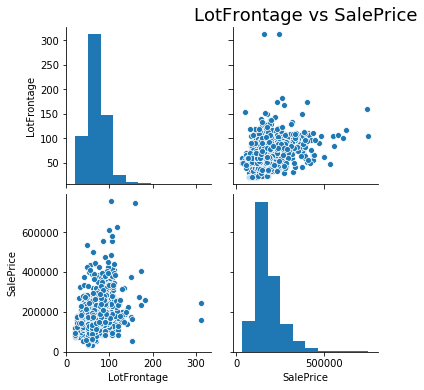

In [11]:
#Check Pairplot of columns LotFrontage and SalePrice
plt.figure(figsize=(10,8))
sns.pairplot(housing[["LotFrontage","SalePrice"]])
plt.tick_params(size=5,labelsize = 15) # tick parameter size in X and Y axes
plt.title("LotFrontage vs SalePrice",fontsize=18) 
plt.show()

In [12]:
#Check correlation of columns LotFrontage and SalePrice via spearman rank correlation coefficient
housing[["LotFrontage","SalePrice"]].corr(method="spearman")

LotFrontage  SalePrice
LotFrontage     1.000000   0.409041
SalePrice       0.409041   1.000000

- from the pairplot and correlation, we can observe LotFrontage and SalePrice are not highly correlated.
- But some correlation exist.

In [13]:
#Check statistics of columns LotFrontage and SalePrice
housing[["LotFrontage","SalePrice"]].describe()

LotFrontage      SalePrice
count  1194.000000    1451.000000
mean     70.027638  180624.101999
std      24.299302   79312.128273
min      21.000000   34900.000000
25%      59.000000  129900.000000
50%      69.000000  162500.000000
75%      80.000000  214000.000000
max     313.000000  755000.000000

In [14]:
# Check the statistics where LotFrontage has null values
housing[housing["LotFrontage"].isna()]["SalePrice"].describe()

count       257.000000
mean     181410.408560
std       58013.807162
min       61000.000000
25%      143250.000000
50%      172000.000000
75%      215000.000000
max      466500.000000
Name: SalePrice, dtype: float64

#### Comparing the statistics of null values and Not-null values data, Median should work as imputation value in LotFrontage

In [15]:
#Median should work to fill NA
housing["LotFrontage"].fillna(housing["LotFrontage"].median(),inplace=True)

In [16]:
#Check null value count
housing.isna().sum().sort_values(ascending=False)

GarageYrBlt      81
ExterQual         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
SalePrice         0
YearBuilt         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
ExterCond         0
OverallCond       0
BsmtUnfSF         0
OverallQual       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
BsmtFinSF2        0
TotalBsmtSF       0
SaleCondition     0
GarageType        0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0


In [17]:
#Check the correlation between GarageYrBlt and YearBuilt
housing[["GarageYrBlt","YearBuilt"]].corr(method="spearman")

GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.889029
YearBuilt       0.889029   1.000000

- GarageYrBlt is highly correlated with YearBuilt.
- Hence GarageYrBlt can be dropped.

In [18]:
#Drop GarageYrBlt column
housing.drop(columns=["GarageYrBlt"],inplace=True)

### Now all Null values are removed from the dataset

In [19]:
print(f"After null value treatment no of rows: {len(housing)}")
print(f"Unprocessed Dataset has {1460} rows")
print(f"Percentage of dataloss happened during null value treatment:{round((1460-1451)/1460,2)}%")

After null value treatment no of rows: 1451
Unprocessed Dataset has 1460 rows
Percentage of dataloss happened during null value treatment:0.01%


- __Drop Id column as it does not add any value to data.__

In [20]:
#Drop Id column 
housing.drop(columns=["Id"],inplace=True)
print(f"No of columns in processed Dataset:{len(housing.columns)}")


No of columns in processed Dataset:74


- __Year columns conversion to datetime format__.

In [21]:
# Convert Year columns YearBuilt,YearRemodAdd,GarageYrBlt and YrSold to datetime 
housing["YearBuilt"] = pd.to_datetime(housing["YearBuilt"],format="%Y").dt.year
housing["YearRemodAdd"] = pd.to_datetime(housing["YearRemodAdd"],format="%Y").dt.year
housing["YrSold"] = pd.to_datetime(housing["YrSold"],format="%Y").dt.year
# I have converted to Year so that we can visualize the year columns and SalePrice relations in pairplot.
# If we convert to datetime , Pairplot does not consider datetime format.


In [22]:
#check the metadata information
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

## Data Analysis :

- The target column is SalePrice
- I will check Distribution and statistics

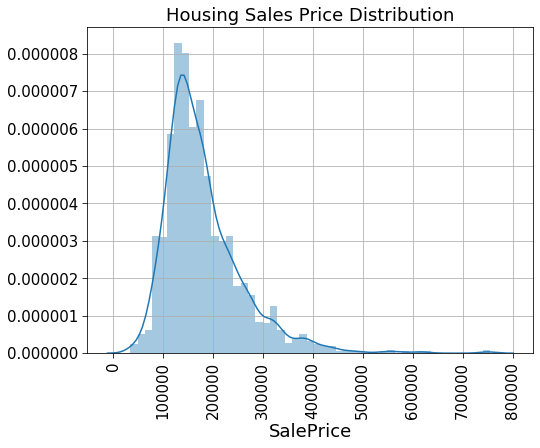

In [23]:
# Plot the distribution plot for SalePrice
plt.figure(figsize=(8,6))
sns.distplot(housing["SalePrice"])
plt.title("Housing Sales Price Distribution",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
plt.xlabel("SalePrice",fontsize=18)
plt.grid(0.3) 

### Observations:
- The SalePrice right skewed with normal distribution
- We can try with __log transformation__ to check to achieve nearly normal distribution.

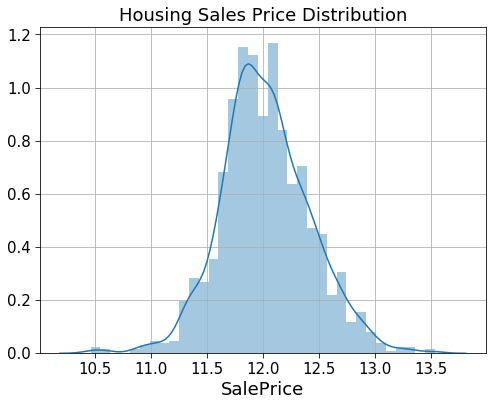

In [24]:
# Plot the distribution plot with log trnasformation
plt.figure(figsize=(8,6))
sns.distplot(np.log(housing["SalePrice"]))
plt.title("Housing Sales Price Distribution",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.xlabel("SalePrice",fontsize=18)
plt.grid(0.3)

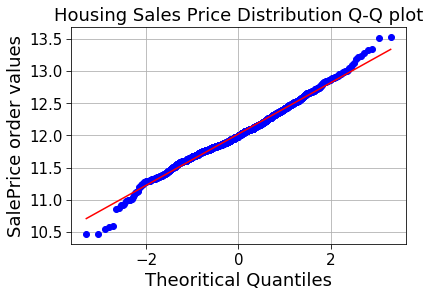

In [25]:
# Check the Q-Q plot from stats model library
plt.figure(figsize=(6,4))
stats.probplot(np.log(housing["SalePrice"]),plot=plt)
plt.title("Housing Sales Price Distribution Q-Q plot",fontsize=18)
plt.ylabel("SalePrice order values",fontsize=18)
plt.xlabel("Theoritical Quantiles",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.grid(0.3)
plt.show()

### Observations:
- Now after log transofmrations, saleprice is amost Normally distributed


In [26]:
#Check the statistics SalePrice
housing["SalePrice"].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- As we have almost 75 columns to explore we can directly visualize pairplot and  - 
- check Correlations via heatmap between among SalePrice and other variables. 

<Figure size 1440x1440 with 0 Axes>

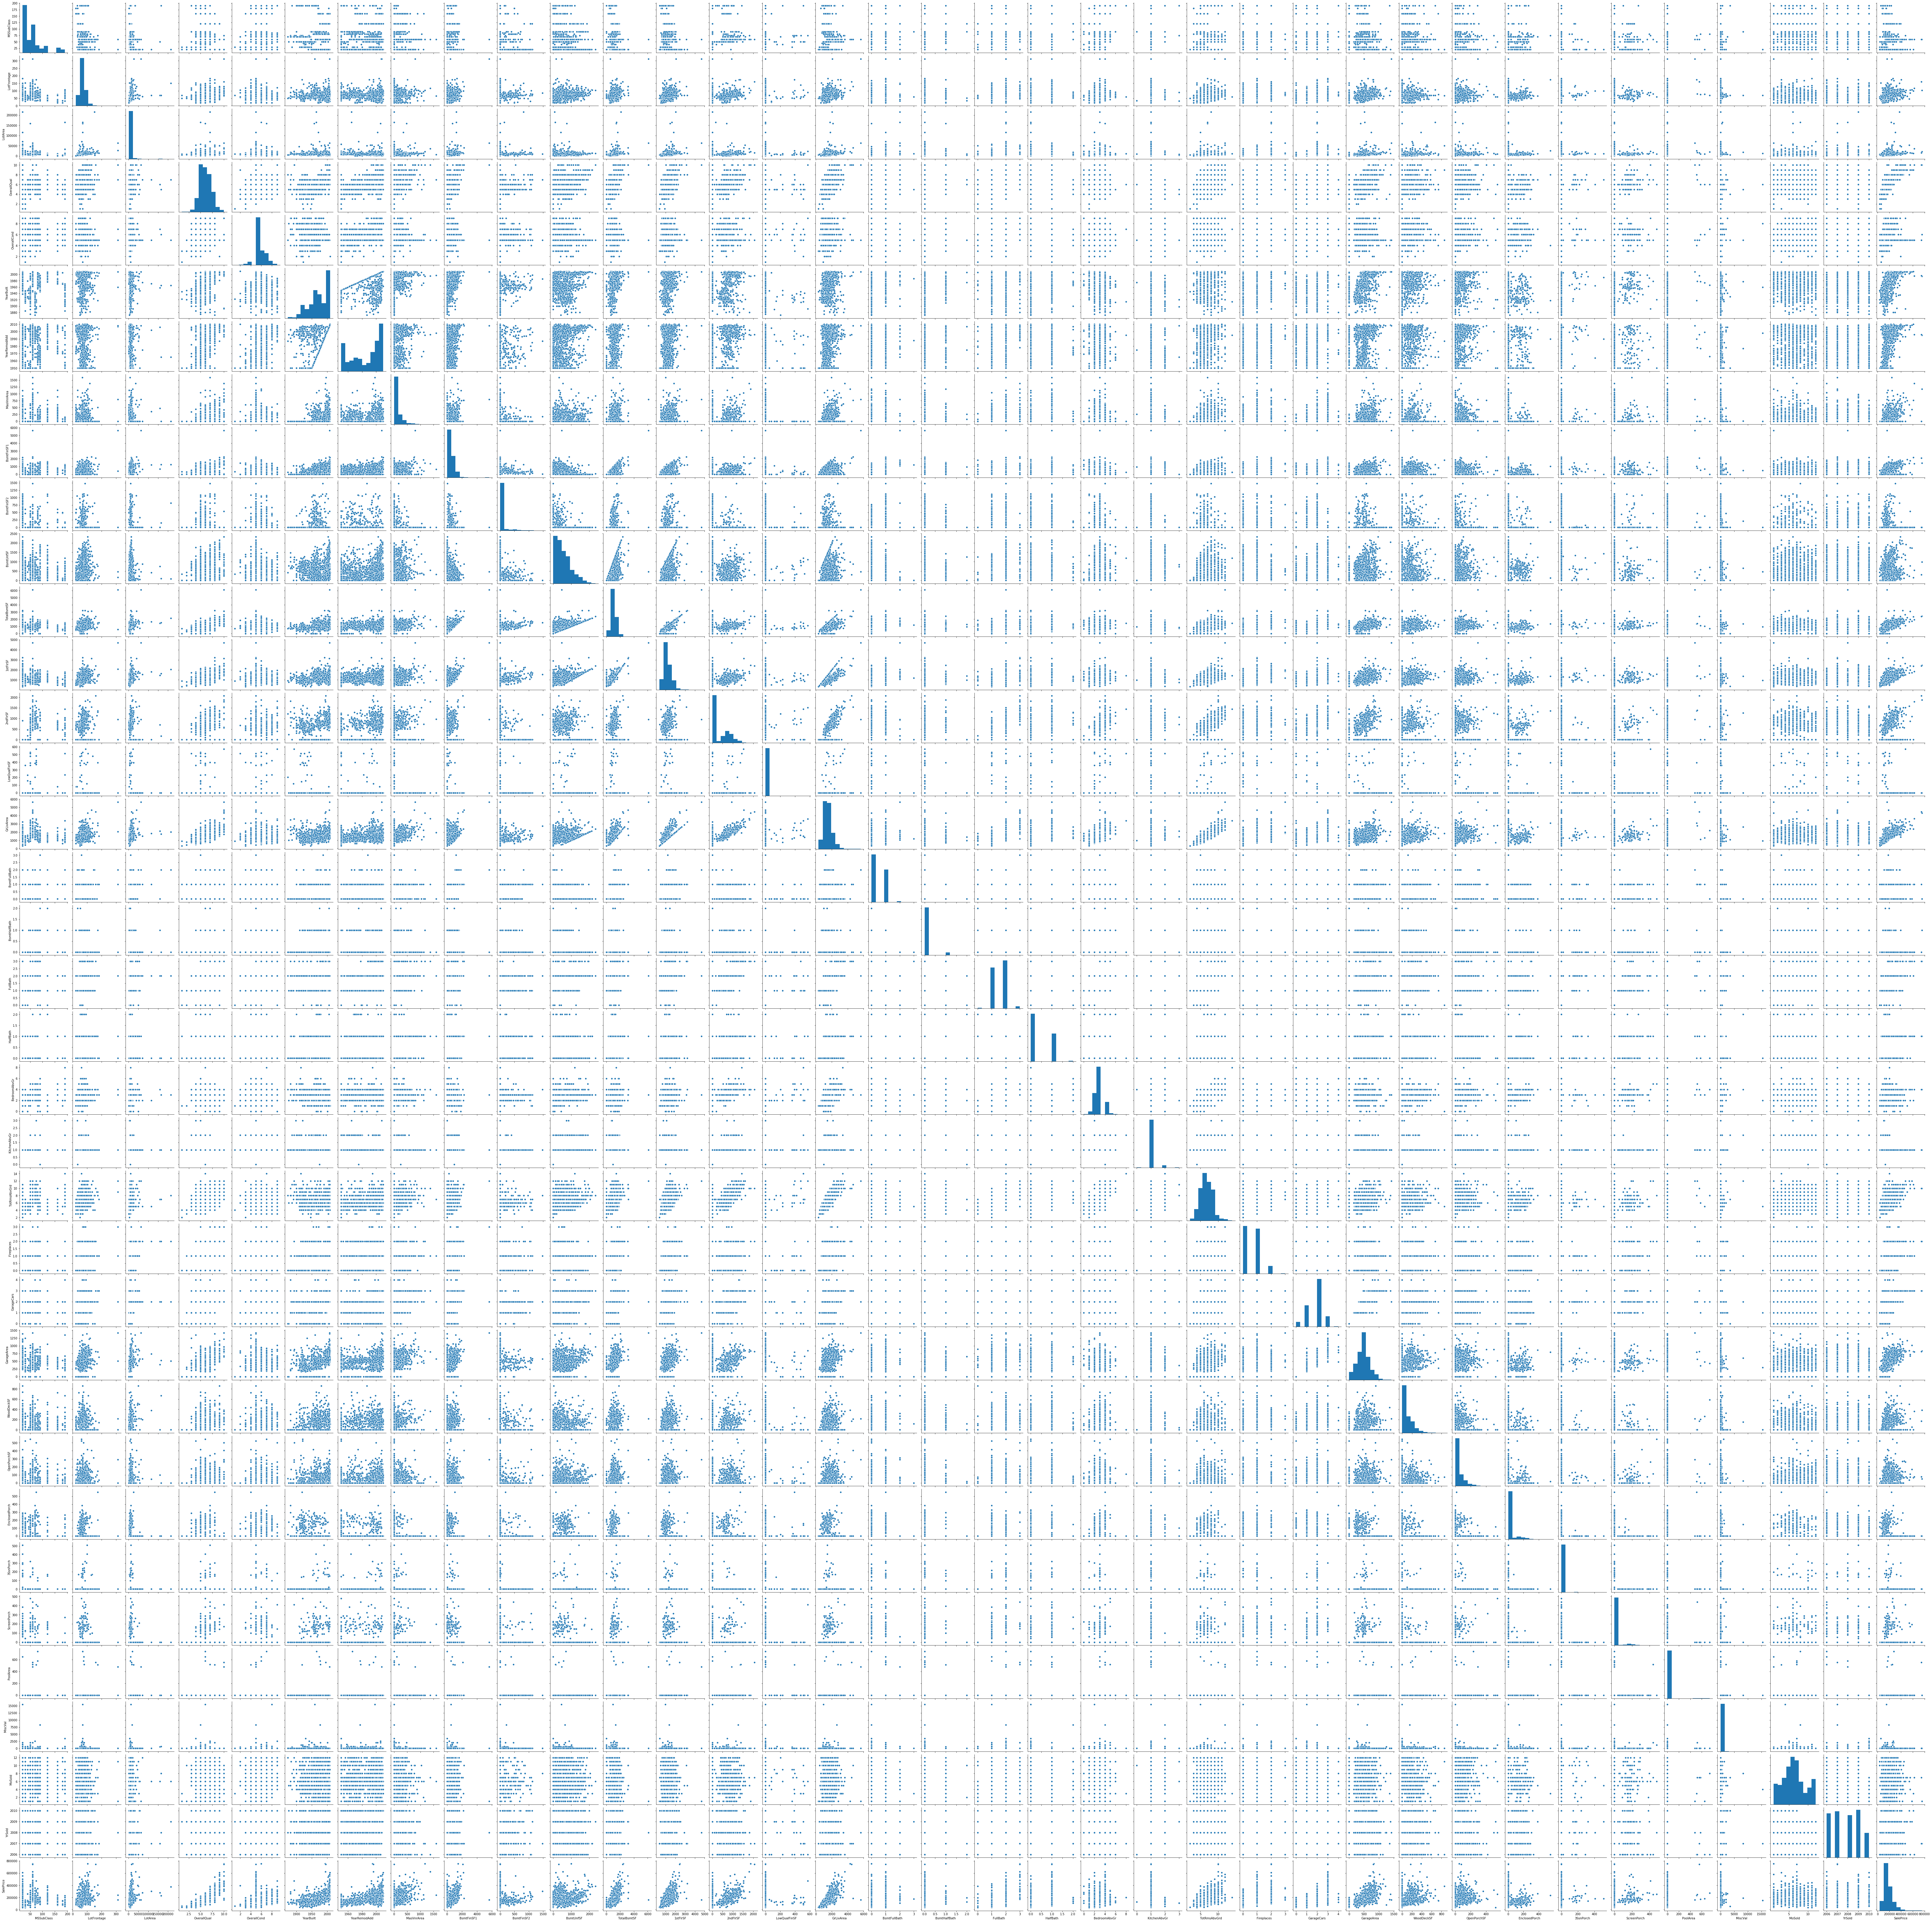

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(housing)
plt.show()

- __SalePrice__ has a postive relation with __OverallQual__.
- __YearsBuilt, YearRemodAdd__ are recent imlplies, __SalePrice__ Increases.
- __Total square feet of basement area(TotalBsmtSF)__ Positively related to __Sales Price__ is more.
- __1stFlrSF and 2ndFlrSF__ are also positively related to __Sales Price__.
- __GrLivArea__ is aslo related to __SalePrice__.
-  __FullBath__ has a positive relation with __Sale Price__.
- similarly __TotRmsAbvGrd,GarageArea,GarageCars__ are also related to __Sale Price__.

### Check the correlation

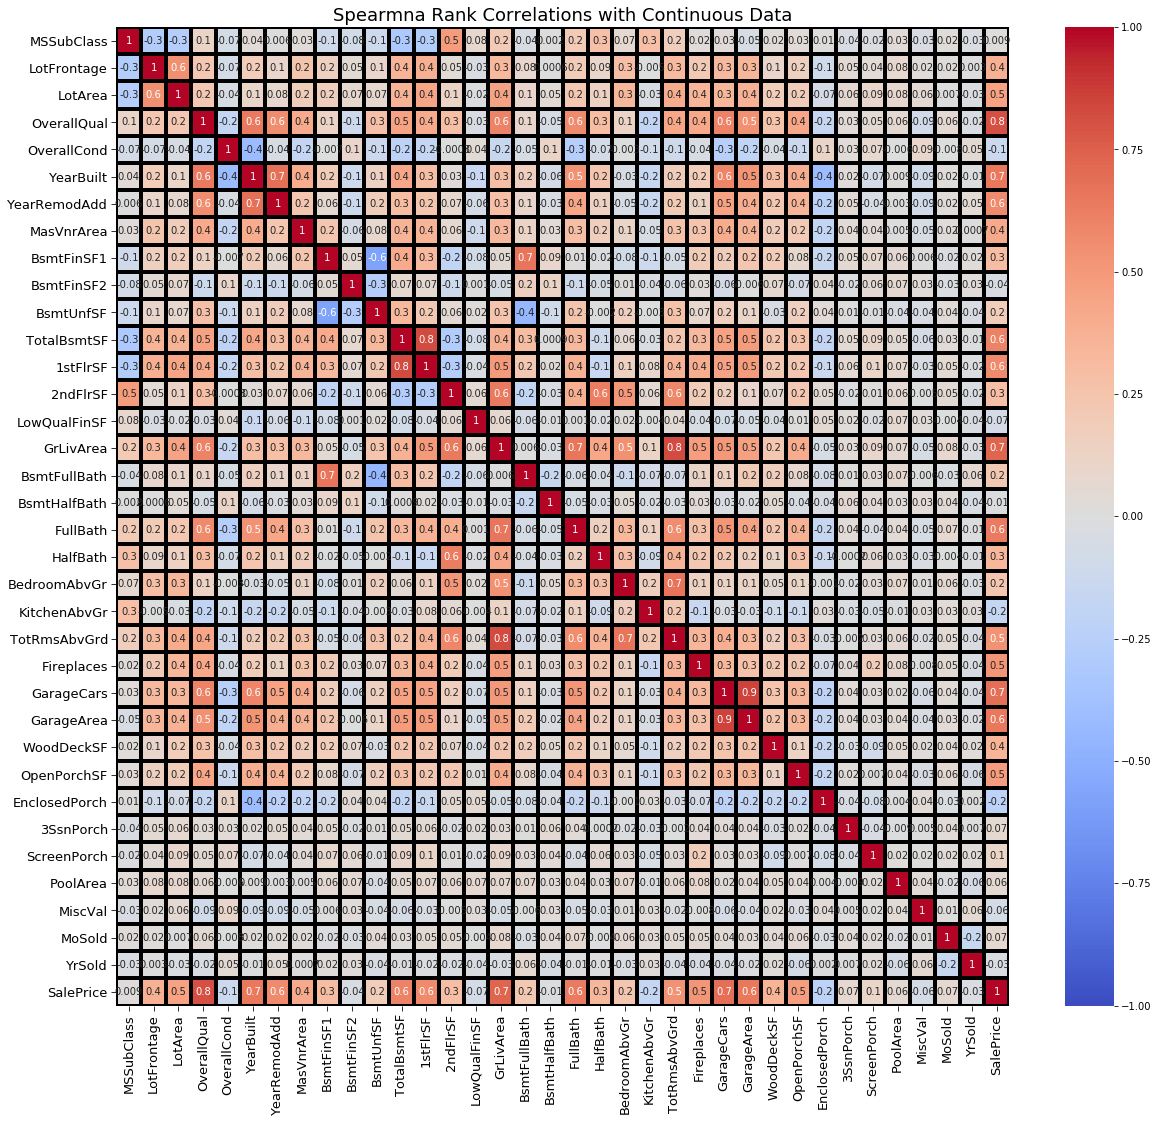

In [28]:
# Sparman rank correlation 
plt.figure(figsize=(20,18)) #figure size
plt.title("Spearmna Rank Correlations with Continuous Data",fontsize=18)
sns.heatmap(housing.corr(method="spearman"),annot=True,fmt='.1g',cmap= 'coolwarm',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 13) # plot ticks size

 - SalePrice has high Postive correlation with 
     - __OverallQual__,
     - __GrLivarea__,
     - __yearBuilt__,
     - __GarageCars__.
 - Sales Price is Moderately postive correlated with 
     - __YearRemodAdd__,
     - __TotalBsmtSF__,
     - __1stFlrSF__,
     - __FullBath__,
     - __TotRmsAbvGrd__,
     - __Fireplaces__,
     - __GarageArea__.
     
     
----------------
- __yearBuilt__ is postively correlated with __YearRemodAdd__.
- __TotRmsAbvGrd__ is highly correlated with __GrLivarea__ .
- __Hence TotRmsAbvGrd can be dropped.__
- __LotFrontage__ and __LotArea__ are also postively correlated .
- Hence __LotFrontage__ can be dropped.

In [29]:
# To avoid multicollinearity we are dropping these columns
housing.drop(columns=["TotRmsAbvGrd","YearRemodAdd","LotFrontage"],inplace=True)

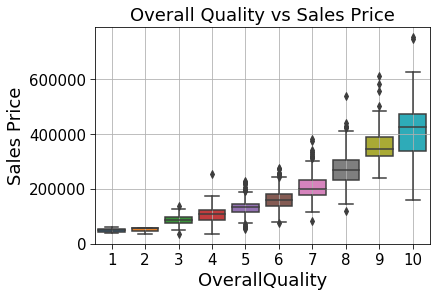

In [30]:
#Check the relation between Overall quality and  Sale Price
plt.figure(figsize=(6,4))
sns.boxplot(x="OverallQual",y="SalePrice",data=housing)
plt.title("Overall Quality vs Sales Price",fontsize=18)
plt.xlabel("OverallQuality",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

 ### Observations:
 - Quality increases , Sales price increases

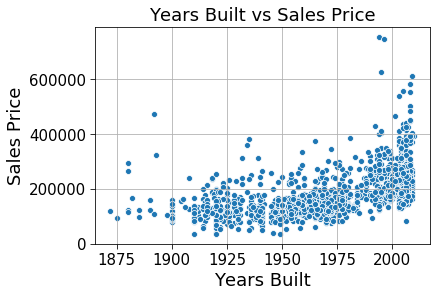

In [31]:
#scattered plot between yeat built and sales price
plt.figure(figsize=(6,4))
sns.scatterplot(x="YearBuilt",y="SalePrice",data=housing)
plt.title("Years Built vs Sales Price",fontsize=18)
plt.xlabel("Years Built",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- For Newly built house , Sales price increases.

### Create a new column House_Age from Years Built and Current Year(2020):

In [32]:
#calculate the age by substracting 2020 from yearBuilt
housing["House_Age"] = housing["YearBuilt"].apply(lambda x:2020-x)

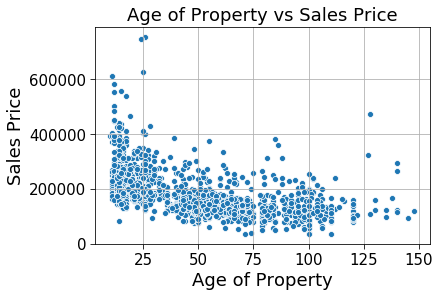

In [33]:
# Plot Age of property vs sales price
plt.figure(figsize=(6,4))
sns.scatterplot(x="House_Age",y="SalePrice",data=housing)
plt.title("Age of Property vs Sales Price",fontsize=18)
plt.xlabel("Age of Property",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- Recently Built houses have high price.

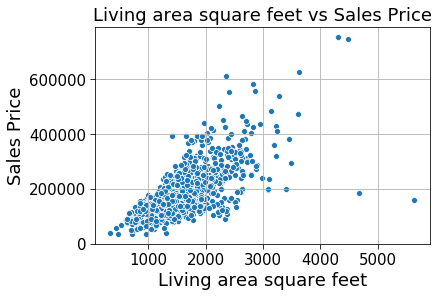

In [34]:
#Plot Living area in sqaurefeet vs Sales Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=housing)
plt.title("Living area square feet vs Sales Price",fontsize=18)
plt.xlabel("Living area square feet",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- Living area square feet more , Sales price increases.

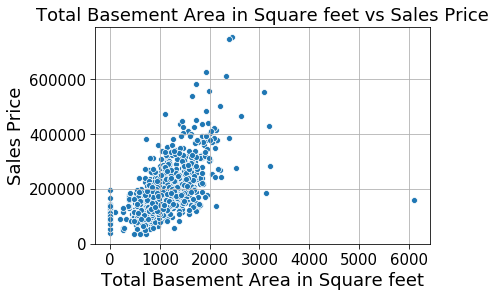

In [35]:
# Plot Total Basement Area vs Sales Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=housing)
plt.title("Total Basement Area in Square feet vs Sales Price",fontsize=18)
plt.xlabel("Total Basement Area in Square feet",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- Total Basement Area in Square feet increases, Sale Price increases.

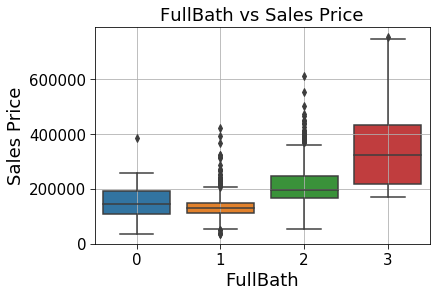

In [36]:
# plot no of FullBathrooms vs sales price
plt.figure(figsize=(6,4))
sns.boxplot(x="FullBath",y="SalePrice",data=housing)
plt.title("FullBath vs Sales Price",fontsize=18)
plt.xlabel("FullBath",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- More no of FullBath rooms , Sale Price increases.

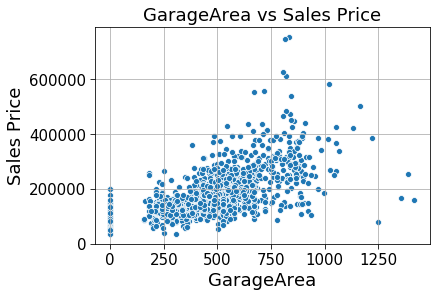

In [37]:
# Plot garage area vs Sales price
plt.figure(figsize=(6,4))
sns.scatterplot(x="GarageArea",y="SalePrice",data=housing)
plt.title("GarageArea vs Sales Price",fontsize=18)
plt.xlabel("GarageArea",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Observations:
- GarageArea more means Sale Price Increases.

### `Categorical Variables and  SalePrice  relations:`

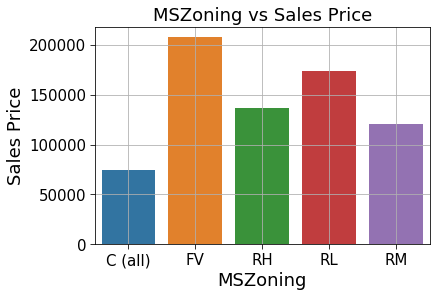

In [38]:
#plot mszoning vs sales price
temp = housing.groupby("MSZoning")["SalePrice"].agg(np.median)
sns.barplot(temp.index,temp.values)
plt.title("MSZoning vs Sales Price",fontsize=18)
plt.xlabel("MSZoning",fontsize=18)
plt.ylabel("Sales Price",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

- Floating Village Residential(FV) properties are more priced

In [39]:
#Check percentages of distributions
housing["MSZoning"].value_counts(normalize=True)

RL         0.789111
RM         0.150241
FV         0.042729
RH         0.011027
C (all)    0.006892
Name: MSZoning, dtype: float64

In [40]:
#Check percentages of distributions for Street
housing["Street"].value_counts(normalize=True)

Pave    0.995865
Grvl    0.004135
Name: Street, dtype: float64

- street will not add any value to predictive modellling as all street are pave
- Hence zero variance column
- We can drop this.

In [41]:
#drop steet column
housing.drop(columns=["Street"],inplace=True)

### Created function to plot box and bar plot when ever required.

In [42]:
#Create function to plot the bar plot with median.
# Median is choosen as Sale Price is skewed and outliers
def plot_bar(column_name,x_label):
    temp = housing.groupby(column_name)["SalePrice"].agg(np.median)
    sns.barplot(temp.index,temp.values)
    plt.title(f"{x_label} vs Sales Price",fontsize=18)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel("Sales Price",fontsize=18)
    plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
    plt.grid(0.3)


In [43]:
#Create function to plot the BOX  plot whereever required.
def plot_box(column_name,x_label):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=column_name,y="SalePrice",data=housing)
    plt.title(f"{x_label} vs Sales Price",fontsize=18)
    plt.ylabel('Sales Price',fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.xlabel(x_label,fontsize=18 )
    plt.grid(0.3)
    

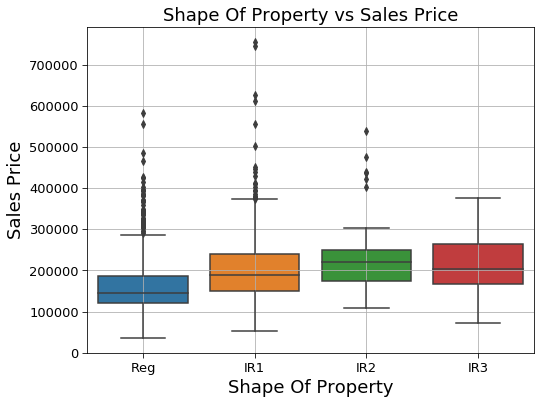

In [44]:
# box plot between Lot shape and Sales Price
plot_box("LotShape","Shape Of Property")

In [45]:
# check th lot shape distributions
housing["LotShape"].value_counts(normalize=True)

Reg    0.632667
IR1    0.332185
IR2    0.028256
IR3    0.006892
Name: LotShape, dtype: float64

### Observations:
- IR2:Moderately Irregular has higher median of sales Price.
- More people have preffered Regular size house in dataset.

In [46]:
#check various LandContour type percentages
housing["LandContour"].value_counts(normalize=True)

Lvl    0.897312
Bnk    0.043418
HLS    0.034459
Low    0.024810
Name: LandContour, dtype: float64

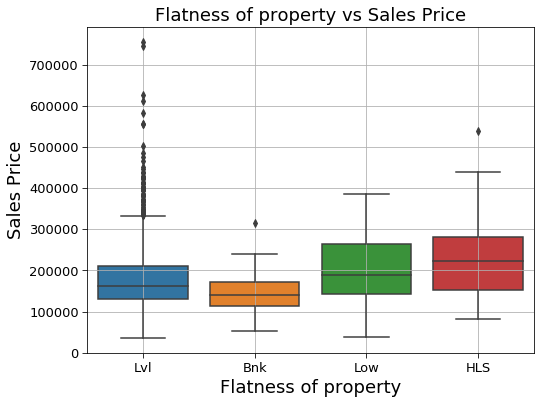

In [47]:
plot_box("LandContour","Flatness of property")

### Observations:
- More no people has preffered Flat properties.
- Hillside Flats are more priced if we compared median.

In [48]:
#check various Utilities type percentages
housing["Utilities"].value_counts(normalize=True)

AllPub    0.999311
NoSeWa    0.000689
Name: Utilities, dtype: float64

- Utilities has 0 variance.
- It will not add anything to model
- Hence we can delete this column

In [49]:
#drop utilities
housing.drop(columns=["Utilities"],inplace=True)

In [50]:
#check various LotConfig type percentages
housing["LotConfig"].value_counts(normalize=True)

Inside     0.720193
Corner     0.180565
CulDSac    0.064094
FR2        0.032391
FR3        0.002757
Name: LotConfig, dtype: float64

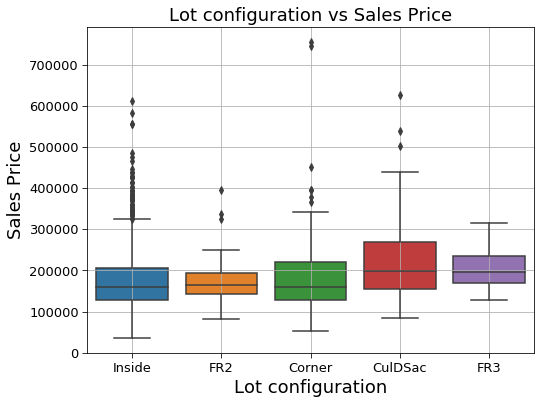

In [51]:
# box plot between LotConfig and Sales Price
plot_box("LotConfig","Lot configuration")

### Observations:
- CulDSa (Cul-de-sac) type of properties are more priced

In [52]:
#check various LandSlope type percentages
housing["LandSlope"].value_counts(normalize=True)

Gtl    0.946244
Mod    0.044797
Sev    0.008959
Name: LandSlope, dtype: float64

- LandSlope has almost zero variance, Hence can be drooped

In [53]:
#drop LandSlope
housing.drop(columns=["LandSlope"],inplace=True)

In [54]:
#check various Neighborhood type percentages
housing["Neighborhood"].value_counts(normalize=True)

NAmes      0.155065
CollgCr    0.102688
OldTown    0.077877
Edwards    0.068918
Somerst    0.057202
Gilbert    0.053756
NridgHt    0.052378
Sawyer     0.050999
NWAmes     0.050310
BrkSide    0.039972
SawyerW    0.039972
Crawfor    0.034459
Mitchel    0.033770
NoRidge    0.028256
Timber     0.025500
IDOTRR     0.025500
ClearCr    0.019297
SWISU      0.017229
StoneBr    0.017229
MeadowV    0.011716
Blmngtn    0.011716
BrDale     0.011027
Veenker    0.007581
NPkVill    0.006203
Blueste    0.001378
Name: Neighborhood, dtype: float64

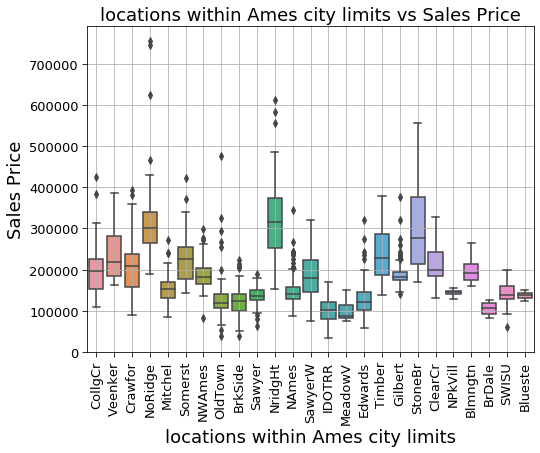

In [55]:
# box plot between Neighborhood and sales price
plt.figure(figsize=(8,6))
sns.boxplot(x="Neighborhood",y="SalePrice",data=housing)
plt.title("locations within Ames city limits vs Sales Price",fontsize=18)
plt.ylabel('Sales Price',fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation='vertical')
plt.xlabel("locations within Ames city limits",fontsize=18 )
plt.grid(0.3)
plt.show()

### Observations:
- Northridge and No-ridge Heights Neighborhoods are more priced.

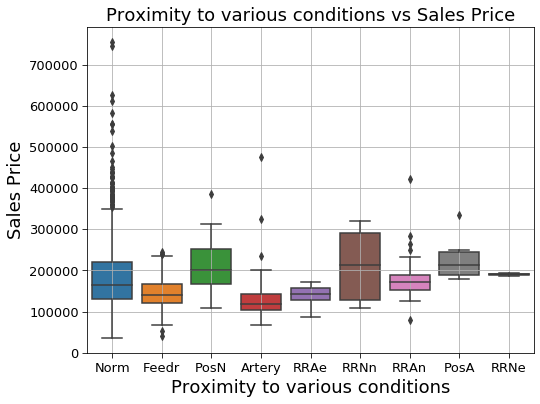

In [56]:
# box plot between Proximity to various conditions and sales price
plot_box("Condition1","Proximity to various conditions")

### Observations:
- Normal type has more spread 
- median is high for "Within 200' of North-South Railroad" and "Near positive off-site featurepark, greenbelt"

In [57]:
##check various Building Type  percentages
housing["BldgType"].value_counts(normalize=True)

1Fam      0.835286
TwnhsE    0.077877
Duplex    0.035837
Twnhs     0.029635
2fmCon    0.021365
Name: BldgType, dtype: float64

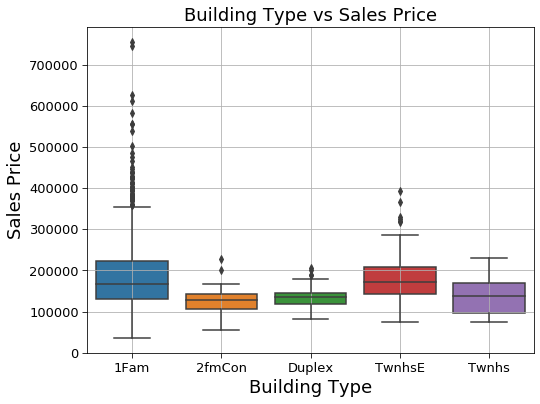

In [58]:
# plot boxplot between Building Type and sales price
plot_box("BldgType","Building Type")
plt.show()

### Observations:
- many people has preffered Single-family Detached type.
- Townhouse End Unit are more priced.

In [59]:
#check various HouseStyle  percentages
housing["HouseStyle"].value_counts(normalize=True)

1Story    0.496899
2Story    0.304618
1.5Fin    0.106134
SLvl      0.044108
SFoyer    0.025500
1.5Unf    0.009649
2.5Unf    0.007581
2.5Fin    0.005513
Name: HouseStyle, dtype: float64

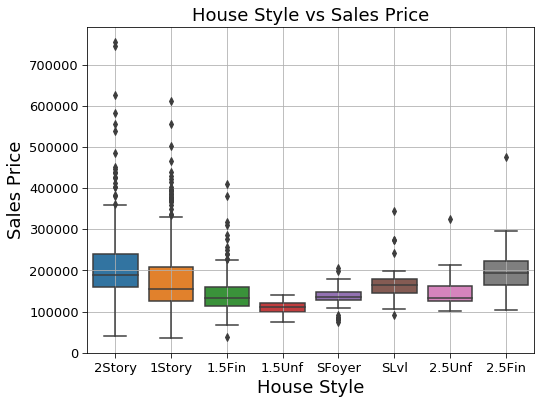

In [60]:
# plot boxplot between House Style and sales price
plot_box("HouseStyle","House Style")

### Observations:
 - "Two story" and "Two and one-half story: 2nd level finished" are more priced

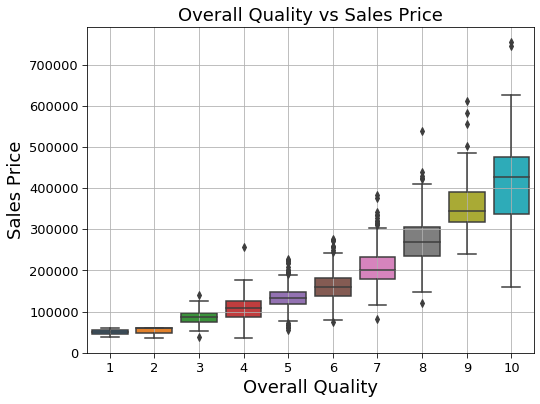

In [61]:
# plot boxplot between Overall Quality and sales price
plot_box("OverallQual","Overall Quality")

### Observations:
 - Sales Price increases with Overall quality rating.

<Figure size 576x432 with 0 Axes>

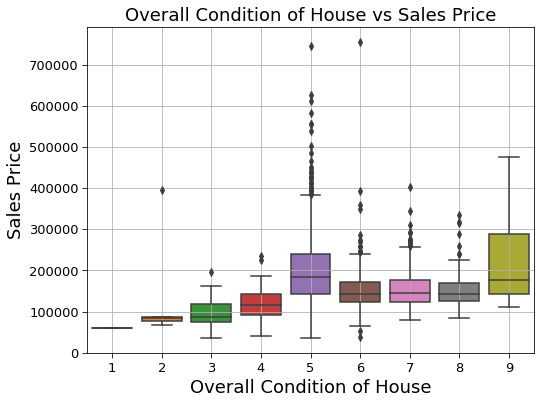

In [62]:
# plot boxplot between Overall Condition of House and sales price
plt.figure(figsize=(8,6))
plot_box("OverallCond","Overall Condition of House")

### Observations:
- Average overall condition has more sales price.

In [63]:
#check various RoofStyle  percentages
housing["RoofStyle"].value_counts(normalize=True)

Gable      0.780841
Hip        0.196416
Flat       0.008959
Gambrel    0.007581
Mansard    0.004824
Shed       0.001378
Name: RoofStyle, dtype: float64

<Figure size 576x432 with 0 Axes>

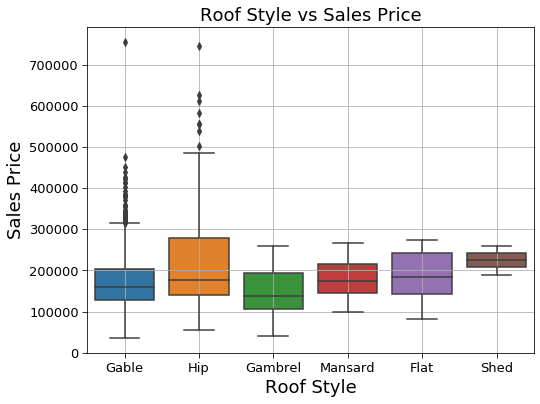

In [64]:
# plot boxplot between Roof Style of House and sales price
plt.figure(figsize=(8,6))
plot_box("RoofStyle","Roof Style")

### Observations:
- Shed type house is more priced

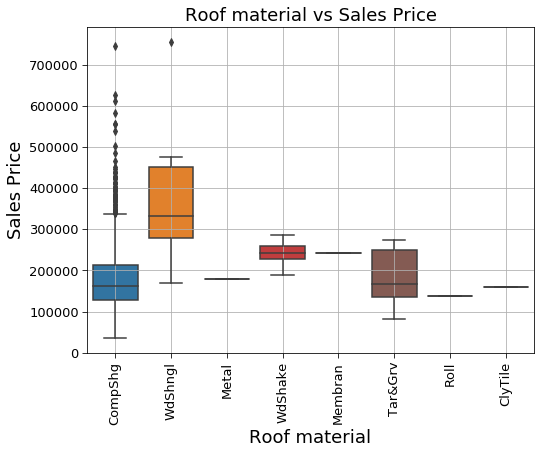

In [65]:
# plot boxplot between Roof material of House and sales price
plt.figure(figsize=(8,6))
sns.boxplot(x="RoofMatl",y="SalePrice",data=housing)
plt.title("Roof material vs Sales Price",fontsize=18)
plt.ylabel('Sales Price',fontsize=18)
plt.tick_params(size=5,labelsize =13)
plt.xticks(rotation='vertical')
plt.xlabel("Roof material",fontsize=18 )
plt.grid(0.3)
plt.show()

### Observations:
- Sales Price of Wood Shingles type house is more

In [66]:
#check various Exterior1st  percentages
housing["Exterior1st"].value_counts(normalize=True)

VinylSd    0.350793
HdBoard    0.152998
MetalSd    0.151620
Wd Sdng    0.141282
Plywood    0.074431
CemntBd    0.040662
BrkFace    0.034459
WdShing    0.017919
Stucco     0.017229
AsbShng    0.013784
Stone      0.001378
BrkComm    0.001378
AsphShn    0.000689
ImStucc    0.000689
CBlock     0.000689
Name: Exterior1st, dtype: float64

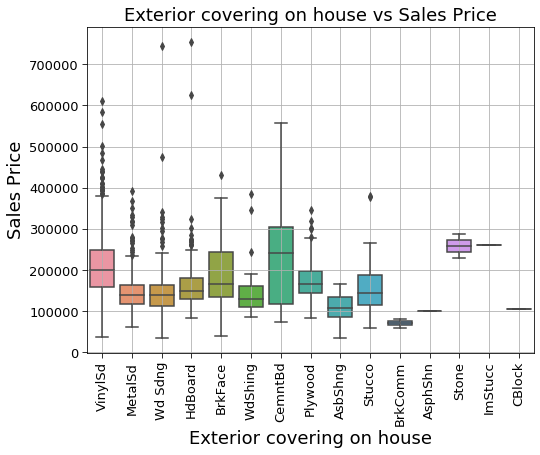

In [67]:
# plot boxplot between Exterior1st  and sales price
plt.figure(figsize=(8,6))
sns.boxplot(x="Exterior1st",y="SalePrice",data=housing)
plt.title("Exterior covering on house vs Sales Price",fontsize=18)
plt.ylabel('Sales Price',fontsize=18)
plt.tick_params(size=5,labelsize =13)
plt.xticks(rotation='vertical')
plt.xlabel("Exterior covering on house",fontsize=18 )
plt.grid(0.3)
plt.show()

### Observations:
- Sales price of Cement Board  in more.

<Figure size 720x576 with 0 Axes>

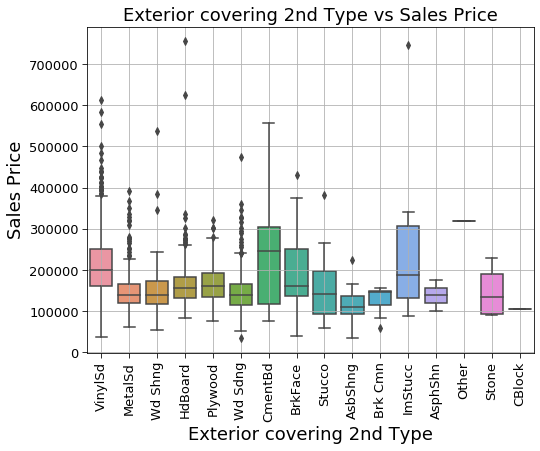

In [68]:
# plot boxplot between Exterior2nd  and sales price
plt.figure(figsize=(10,8))
plot_box("Exterior2nd","Exterior covering 2nd Type")
plt.xticks(rotation='vertical')
plt.show()

### Observations:
- Sales price of Cement Board  in more.

In [69]:
#check various MasVnrType  percentages
housing["MasVnrType"].value_counts(normalize=True)

None       0.594762
BrkFace    0.306685
Stone      0.088215
BrkCmn     0.010338
Name: MasVnrType, dtype: float64

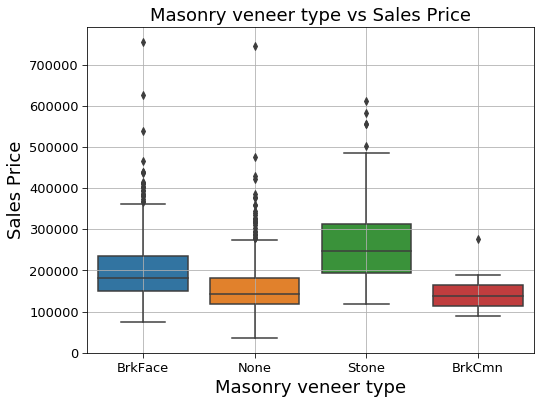

In [70]:
#Boxplot between MasVnrType and sales price
plot_box("MasVnrType","Masonry veneer type")

### Observations:
- Sales price of stone veneer  in more.

## Map the Oridnal variables with Appropriate values

In [71]:
#mapping of ExterQual
housing["ExterQual"]= housing["ExterQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})

In [72]:
#mapping of ExterCond
housing["ExterCond"]= housing["ExterCond"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})


In [73]:
#mapping of BsmtQual
housing["BsmtQual"] = housing["BsmtQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,-1:-1})

In [74]:
#mapping of BsmtCond
housing["BsmtCond"] = housing["BsmtCond"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,-1:-1})

In [75]:
#mapping of HeatingQC
housing["HeatingQC"] = housing["HeatingQC"].map({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1 })

In [76]:
#mapping of KitchenQual
housing["KitchenQual"] = housing["KitchenQual"].map({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1 })

In [77]:
housing["GarageQual"] = housing["GarageQual"].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,-1:-1})

In [78]:
housing["GarageCond"] = housing["GarageCond"].map({"Ex":5, "Gd":4, "TA":3,"Fa":2, "Po":1, -1:-1 })

In [79]:
housing["BsmtExposure"] = housing["BsmtExposure"].map({"Gd":3, "Av":2, "Mn":1, "No":0,-1:-1 })

housing["BsmtFinType1"] = housing["BsmtFinType1"].map({'GLQ':5, 'ALQ':4, 'BLQ':3,'Rec':2,'LwQ':1, 'Unf':0, -1:-1, })

housing["BsmtFinType2"]= housing["BsmtFinType2"].map({'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':2, 'BLQ':3, -1:-1, 'LwQ':1})

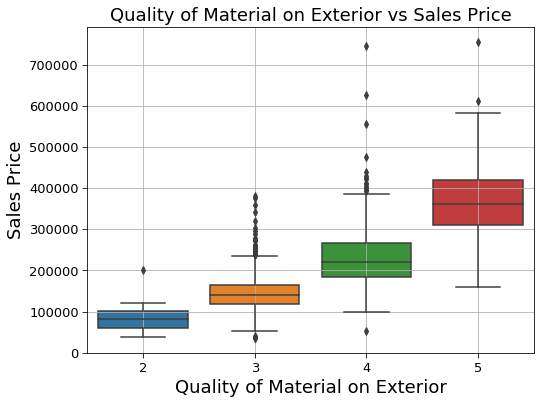

In [80]:
# plot boxplot between ExterQual  and sales price
plot_box("ExterQual","Quality of Material on Exterior")

### Observations:
- Sales price of hosue whose Quality of Material on Exterior is excellent, is more.

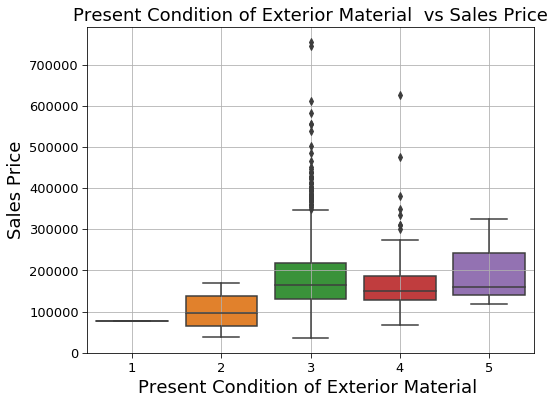

In [81]:
# plot boxplot between ExterCond  and sales price
plot_box("ExterCond","Present Condition of Exterior Material ")

### Observations:
- Sales price of Average present condition od exterior material  is more.

In [82]:
# various Foundation type perceatnges
housing["Foundation"].value_counts(normalize=True)

PConc     0.439697
CBlock    0.436940
BrkTil    0.100620
Slab      0.016540
Stone     0.004135
Wood      0.002068
Name: Foundation, dtype: float64

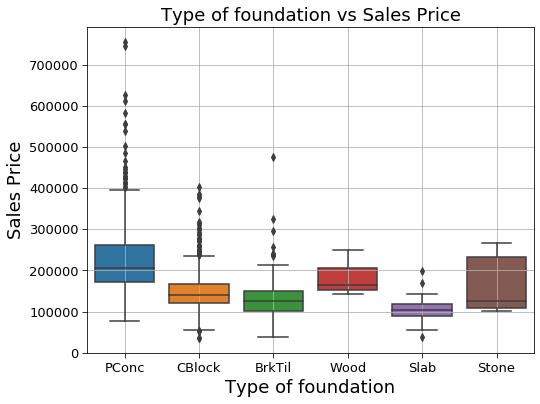

In [83]:
# plot boxplot between Foundation  and sales price
plot_box("Foundation","Type of foundation")

### Observations:
- Poured Contrete foundation is more priced.

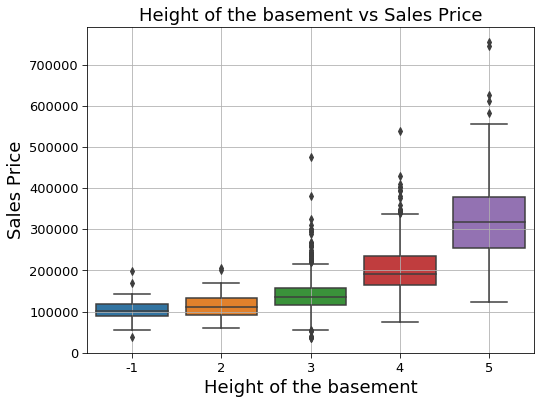

In [84]:
# plot boxplot between BsmtQual  and sales price
plot_box("BsmtQual","Height of the basement")

 
### Observations:
- Sales price of houses are more where height of the basement is more.
 

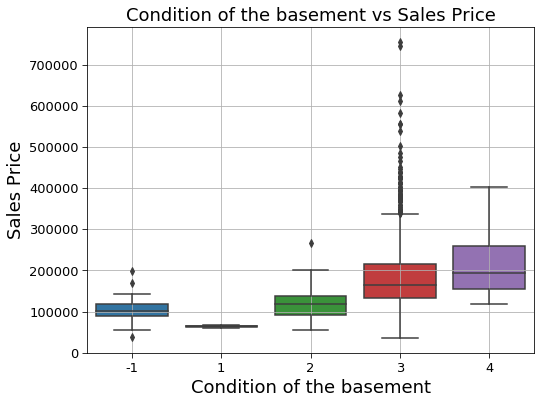

In [85]:
# plot boxplot between BsmtCond  and sales price
plot_box("BsmtCond","Condition of the basement")

### Observations:
- Sales price of Excellent basement condition  in more.


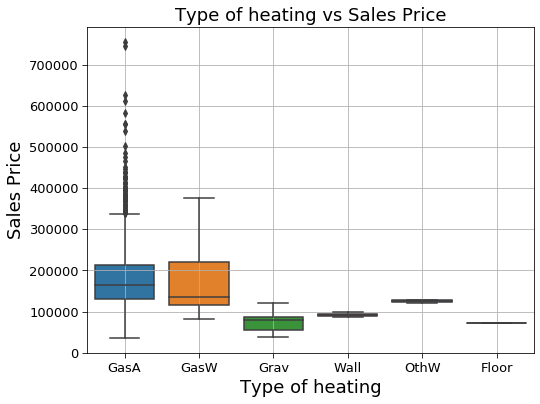

In [86]:
# plot boxplot between Heating  and sales price
plot_box("Heating","Type of heating")

### Observations:
- Sales price of house where gas heating in available is more.

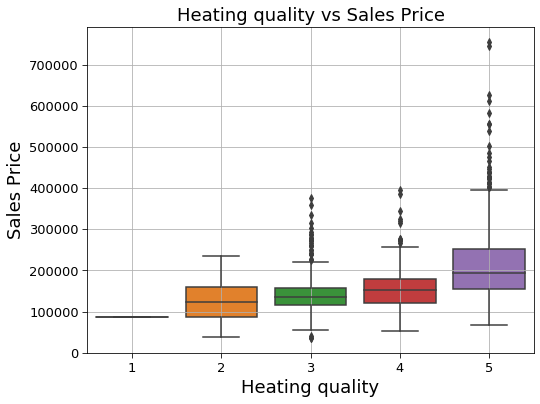

In [87]:
# plot boxplot between HeatingQC  and sales price
plot_box("HeatingQC","Heating quality")

### Observations:
- Sales price increases with heating quality

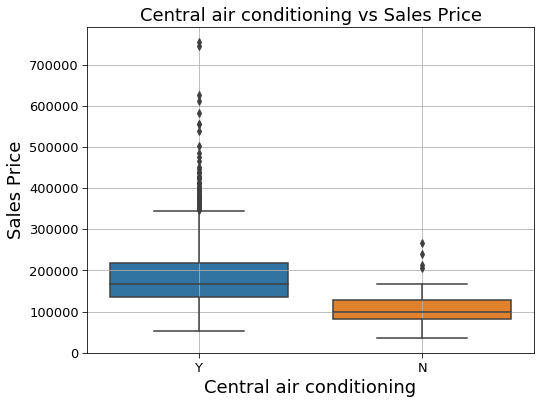

In [88]:
plot_box("CentralAir","Central air conditioning")

### Observations:
- Sales price of house is more where Air condition is available.

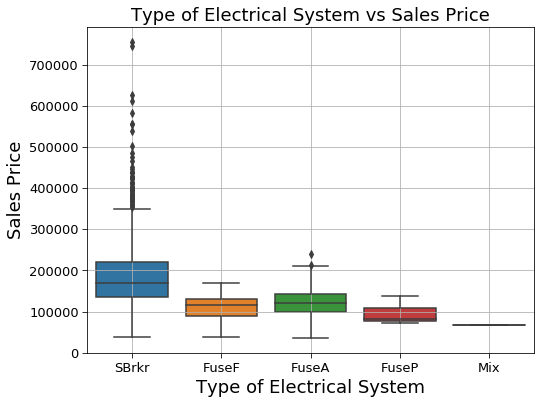

In [89]:
# plot_bar("Electrical","Type of Electrical System")
plot_box("Electrical","Type of Electrical System")

### Observations:
- Standard Circuit Breakers & Romex houses are more priced.

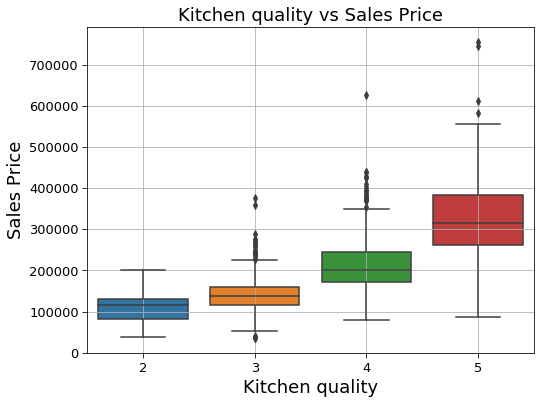

In [90]:
#boxplot between kitchen quality and sales price
plot_box("KitchenQual","Kitchen quality")

### Observations:
- kitchen Quality excellent,House price more

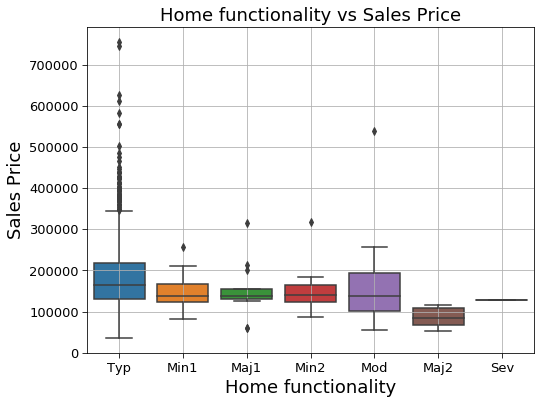

In [91]:
#boxplot between Functional and sales price
plot_box("Functional","Home functionality")

### Observations:
Typical Functionality houses are more priced.

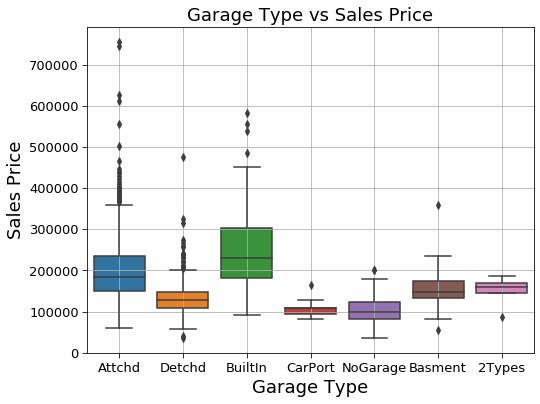

In [92]:
#boxplot between GarageType and sales price
plot_box("GarageType","Garage Type")

### Observations:
- House price is more where Built-In (Garage part of house) garages are available.

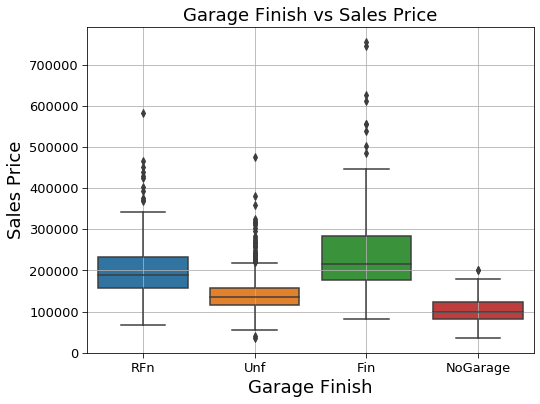

In [93]:
#boxplot between GarageFinish and sales price
plot_box("GarageFinish","Garage Finish")

### Observations:
- Finished garages with houses are more priced

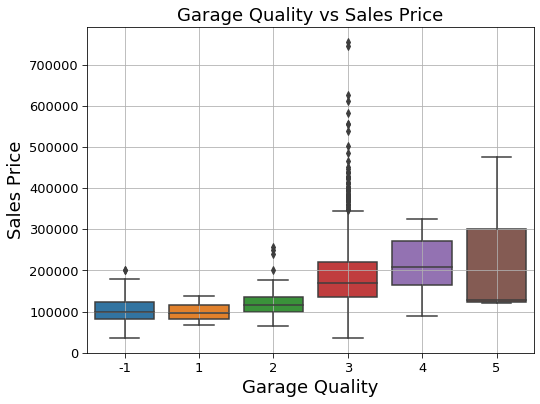

In [94]:
#boxplot between GarageQual and sales price
plot_box("GarageQual","Garage Quality")

### Observations:
- Typical garage with houses are more priced

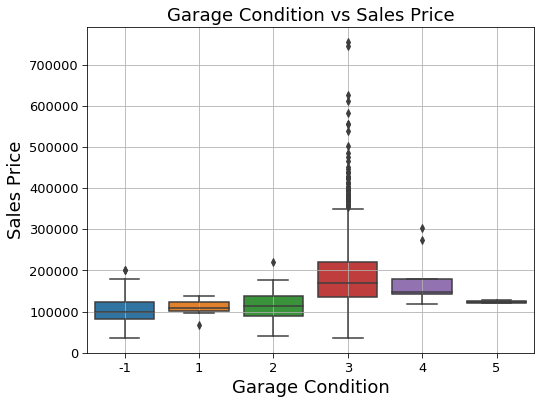

In [95]:
#boxplot between Garage Condition and sales price
plot_box("GarageCond","Garage Condition")

### Observations:
- Typical garage condition with houses are more priced

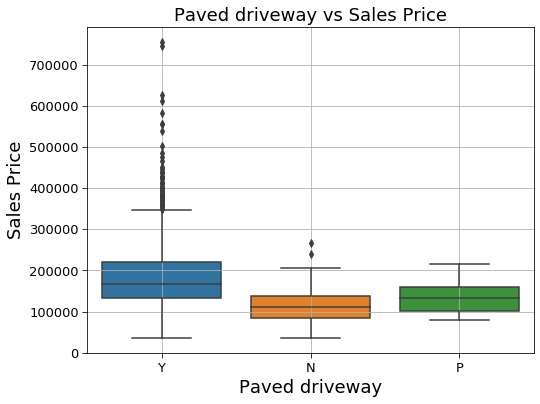

In [96]:
#boxplot between Paved driveway and sales price
plot_box("PavedDrive","Paved driveway")

### Observations:
- Paved roadway with houses are more priced


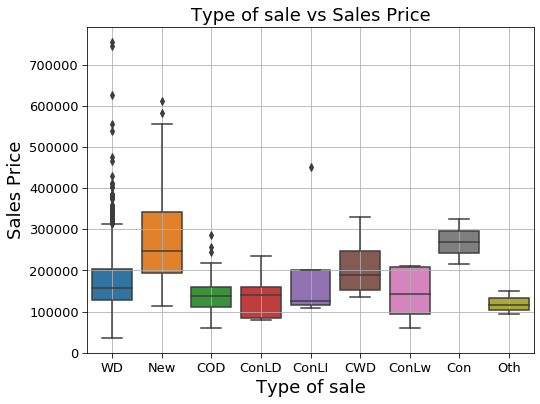

In [97]:
#boxplot between Type of sale and sales price
plot_box("SaleType","Type of sale")

### Observations:
- Newly built houses are more priced.

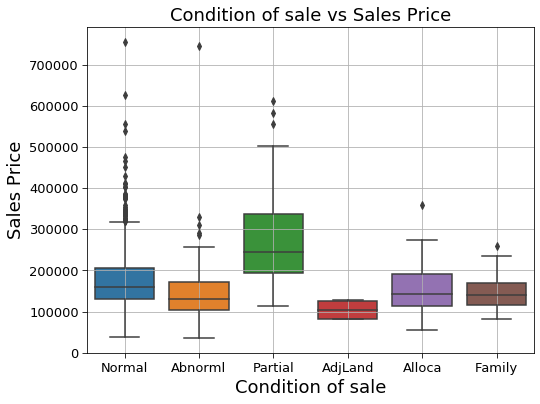

In [98]:
#boxplot between Type of sale and sales price
plot_box("SaleCondition","Condition of sale")

### Observations:
- Partial comlpleted houses are more priced.

__Total Basement are in sqaurefeet is available, Hecen we have dropped individual Basement.__

In [99]:
# Total Basement are in sqaurefeet is available, Hecen we have dropped individual Basement
housing.drop(columns=["BsmtFinSF1","BsmtFinSF2"],inplace=True)

In [100]:
#check pool area percentages
housing["PoolArea"].value_counts(normalize=True)

0      0.995176
738    0.000689
648    0.000689
576    0.000689
555    0.000689
519    0.000689
512    0.000689
480    0.000689
Name: PoolArea, dtype: float64

__Pool area has no vairance, We can delete__

In [101]:
#drop poolarea
housing.drop(columns=["PoolArea"],inplace=True)

In [102]:
housing["3SsnPorch"].value_counts(normalize=True)

0      0.983460
168    0.002068
216    0.001378
144    0.001378
180    0.001378
245    0.000689
238    0.000689
290    0.000689
196    0.000689
182    0.000689
407    0.000689
304    0.000689
162    0.000689
153    0.000689
320    0.000689
140    0.000689
130    0.000689
96     0.000689
23     0.000689
508    0.000689
Name: 3SsnPorch, dtype: float64

In [103]:
housing["MiscVal"].value_counts(normalize=True)

0        0.964163
400      0.007581
500      0.005513
700      0.003446
450      0.002757
2000     0.002757
600      0.002757
1200     0.001378
480      0.001378
1150     0.000689
800      0.000689
15500    0.000689
620      0.000689
3500     0.000689
560      0.000689
2500     0.000689
1300     0.000689
1400     0.000689
350      0.000689
8300     0.000689
54       0.000689
Name: MiscVal, dtype: float64

__MiscVal,3SsnPorch__ has zero variance columns.
Hence can be deleted.

In [104]:
#drop MiscVal and 3SsnPorch
housing.drop(columns=["MiscVal","3SsnPorch"],inplace=True)

- __created a new column Total_SFT from 1stFlrSF and 2ndFlrSF.__
- __Hence we can delete 1stFlrSF and 2ndFlrSF column.__

In [105]:
#make a new column Total_SFT
housing["Total_SFT"] = housing["1stFlrSF"]+housing["2ndFlrSF"]

In [106]:
#drop 1stFlrSF and 2ndFlrSF
housing.drop(columns=["1stFlrSF","2ndFlrSF"],inplace=True)

- __House_Age we have addedd,Hence YearBuilt column will be dropped__

In [107]:
#drop YearBuilt as we have Age of House column
housing.drop(columns= ["YearBuilt"],inplace=True)

- __Month sold and Year sold are future values, hence does not add any value to Model.__
- So dropped.

In [108]:
#drop MoSold and YrSold
housing.drop(columns=["MoSold","YrSold"],inplace=True)

In [109]:
#Check the metadata for verification purpose after all processing
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   LotShape       1451 non-null   object 
 4   LandContour    1451 non-null   object 
 5   LotConfig      1451 non-null   object 
 6   Neighborhood   1451 non-null   object 
 7   Condition1     1451 non-null   object 
 8   Condition2     1451 non-null   object 
 9   BldgType       1451 non-null   object 
 10  HouseStyle     1451 non-null   object 
 11  OverallQual    1451 non-null   int64  
 12  OverallCond    1451 non-null   int64  
 13  RoofStyle      1451 non-null   object 
 14  RoofMatl       1451 non-null   object 
 15  Exterior1st    1451 non-null   object 
 16  Exterior2nd    1451 non-null   object 
 17  MasVnrType     1451 non-null   object 
 18  MasVnrAr

- __Now we have 60 columns and 1451 rows.__

### Separate the Numeric and categorical columns 

In [110]:
# segregate categorical and numerical columns
categorical_housing = housing.select_dtypes("object")
numeric_housing = housing.select_dtypes(["number"])
print(f"Shape of Categorical data:{categorical_housing.shape}")
print(f"Shape of Numerical data:{numeric_housing.shape}")

Shape of Categorical data:(1451, 24)
Shape of Numerical data:(1451, 36)


- __Target column SalePrice is skewed and outliers.__
- __Hence log transformation is applied to SalePrice.__

In [111]:
#log transofroamtions for Target Column Sale Price
numeric_housing["SalePrice"] = np.log(numeric_housing["SalePrice"])

In [112]:
#check the data
numeric_housing["SalePrice"].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Create dummy variables for categorical columns:

In [113]:
#Create dummy variables for categorical columns
categorical_after_dummy = pd.get_dummies(categorical_housing,drop_first=True)
print(f"Shape after dummy variable conversion:{categorical_after_dummy.shape}")

Shape after dummy variable conversion:(1451, 153)


In [114]:
#Check categorical after dummy variable conversion
categorical_after_dummy

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0               0            0            1            0             0   
1               0            0            1            0             0   
2               0            0            1            0             0   
3               0            0            1            0             0   
4               0            0            1            0             0   
...           ...          ...          ...          ...           ...   
1455            0            0            1            0             0   
1456            0            0            1            0             0   
1457            0            0            1            0             0   
1458            0            0            1            0             0   
1459            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0                0             1                0                0   
1                0             1                0                0   
2                0             0                0                0   
3                0             0                0                0   
4                0             0                0                0   
...            ...           ...              ...              ...   
1455             0             1                0                0   
1456             0             1                0                0   
1457             0             1                0                0   
1458             0             1                0                0   
1459             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                   1                  0              0              0   
1                   1                  0              1              0   
2                   1                  0              0              0   
3                   1                  0              0              0   
4                   1                  0              1              0   
...               ...                ...            ...            ...   
1455                1                  0              0              0   
1456                1                  0              0              0   
1457                1                  0              0              0   
1458                1                  0              0              0   
1459                1                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                    1                     0                    0   
1                    0                     0                    0   
2                    1                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   
...                ...                   ...                  ...   
1455                 1                     0                    0   
1456                 1                     0                    0   
1457                 1                     0                    0   
1458                 1                     0                    0   
1459                 1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0              

In [115]:
# Add the dummy variable to numerical columns 
housing_all = pd.concat([numeric_housing,categorical_after_dummy],axis=1)


In [116]:
#verify the metadata
housing_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(153)
memory usage: 676.2 KB


In [117]:
#peform the train test split of data
train_housing,test_housing = train_test_split(housing_all,test_size=0.3,random_state=45)

In [118]:
print(f"Shape of training data:{train_housing.shape}")

Shape of training data:(1015, 189)


In [119]:
print(f"Shape of test data:{test_housing.shape}")

Shape of test data:(436, 189)


In [120]:
#check the metadata for for traing columns
# It will be helpful for scaling as we do not include dummy variables for scaling.
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 1279 to 976
Columns: 189 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(153)
memory usage: 445.1 KB


In [121]:
#select only numeric data for scaling
train_housing_numeric_data = train_housing.select_dtypes(["float64","int64"])

In [122]:
print(f"Shape of Numeric columns:{train_housing_numeric_data.shape}")
print("---------------------------")
#Numric column  names to be stored in a variable for future use
numeric_columns = train_housing_numeric_data.columns
print(numeric_columns)

Shape of Numeric columns:(1015, 36)
---------------------------
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'House_Age',
       'Total_SFT'],
      dtype='object')


In [123]:
### I have used minmax scaling
minmax = MinMaxScaler()
train_housing[numeric_columns]= minmax.fit_transform(train_housing[numeric_columns])


### Final Training data to be feed to various Model:

In [124]:
train_housing.head()
## Here we can see dummy vaoribales are remain as it is, only numeric columns are scaled with minmax scale

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1279    0.176471  0.028979        0.250     0.285714    0.000000   0.333333   
1258    0.352941  0.038734        0.625     0.428571    0.132075   0.666667   
160     0.000000  0.045900        0.500     0.571429    0.000000   0.333333   
420     0.411765  0.026923        0.625     0.428571    0.145138   0.333333   
48      1.000000  0.014751        0.250     0.428571    0.000000   0.333333   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
1279   0.666667  0.666667       0.8          0.25      0.166667      0.166667   
1258   0.333333  0.833333       0.8          1.00      1.000000      0.166667   
160    0.333333  0.833333       0.8          0.25      0.666667      0.166667   
420    0.666667  0.833333       1.0          1.00      1.000000      0.166667   
48     0.333333  0.666667       0.8          0.25      0.166667      0.166667   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  LowQualFinSF  GrLivArea  \
1279   0.324199     0.114239       0.50           0.0   0.132590   
1258   0.093358     0.140098       1.00           0.0   0.139892   
160    0.265676     0.201637       0.50           0.0   0.152575   
420    0.016256     0.219967       1.00           0.0   0.174097   
48     0.341849     0.120458       0.75           0.0   0.194850   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1279           0.0           0.0  0.333333       0.0         0.250   
1258           0.5           0.0  0.666667       0.0         0.250   
160            0.0           0.0  0.666667       0.0         0.375   
420            1.0           0.0  0.666667       0.0         0.250   
48             0.0           0.0  0.666667       0.0         0.250   

      KitchenAbvGr  KitchenQual  Fireplaces  GarageCars  GarageArea  \
1279      0.333333     0.333333         0.0         0.5    0.372355   
1258      0.333333     0.666667         0.0         0.5    0.282087   
160       0.333333     0.333333         0.0         0.5    0.363893   
420       0.666667     0.333333         0.0         1.0    0.552891   
48        1.000000     0.333333         0.0         0.0    0.000000   

      GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1279    0.666667    0.666667    0.035006          0.0       0.297101   
1258    0.666667    0.666667    0.247375          0.0       0.000000   
160     0.666667    0.666667    0.000000          0.0       0.000000   
420     0.666667    0.666667    0.000000          0.0       0.000000   
48      0.000000    0.000000    0.000000          0.0       0.184783   

      ScreenPorch  SalePrice  House_Age  Total_SFT  MSZoning_FV  MSZoning_RH  \
1279          0.0   0.218879   0.652174   0.132590            0            0   
1258          0.0   0.551207   0.036232   0.139892            0            0   
160           0.0   0.500350   0.188406   0.152575            0            0   
420           0.0   0.577980   0.094203   0.174097            0            0   
48            0.0   0.382177   0.652174   0.194850            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1279            0            0             0             0             1   
1258            1            0             0             0             0   
160             1            0             0             0             0   
420             0            1             0             0             1   
48              0            1             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
1279                0                0                1                  0   
1258                0                0                1                  0   
160                 0                0                1                  1   
420                 0                0                1                  0   
48                  0     

In [125]:
#Convert data for X_train and y_train for model training
y_train = train_housing.pop("SalePrice")
X_train = train_housing

### Final Test data to be feed to various Model:

In [126]:
#Scale the test data numeric columns 
test_housing[numeric_columns] = minmax.transform(test_housing[numeric_columns])

In [127]:
test_housing.head()
## Here we can see dummy vaoribales are remain as it is, only numeric columns are scaled with minmax scale

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
699     0.588235  0.013938        0.625     0.428571         0.0   0.666667   
1453    0.000000  0.074398        0.375     0.428571         0.0   0.333333   
239     0.176471  0.034780        0.500     0.285714         0.0   0.333333   
720     0.588235  0.024600        0.750     0.428571         0.0   0.666667   
535     1.000000  0.026642        0.375     0.714286         0.0   0.333333   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
699    0.333333  0.833333       0.8          0.50      1.000000      0.166667   
1453   0.333333  0.833333       0.8          0.25      0.166667      0.166667   
239    0.333333  0.666667       0.6          0.25      0.333333      0.166667   
720    0.333333  0.833333       0.8          1.00      1.000000      0.166667   
535    0.333333  0.833333       0.8          1.00      1.000000      0.166667   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  LowQualFinSF  GrLivArea  \
699    0.638644     0.227660        1.0           0.0   0.183128   
1453   0.529494     0.186579        1.0           0.0   0.134896   
239    0.297724     0.120295        0.5           0.0   0.201576   
720    0.275894     0.285106        0.5           0.0   0.250576   
535    0.068741     0.182815        0.5           0.0   0.174673   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
699            0.0           0.0  0.666667       0.0         0.250   
1453           0.0           0.0  0.333333       0.0         0.375   
239            0.0           0.0  0.333333       0.5         0.375   
720            0.5           0.0  0.666667       0.0         0.250   
535            0.5           0.0  0.333333       0.0         0.375   

      KitchenAbvGr  KitchenQual  Fireplaces  GarageCars  GarageArea  \
699       0.333333     0.666667    0.000000        0.50    0.373766   
1453      0.333333     0.333333    0.000000        0.00    0.000000   
239       0.333333     0.333333    0.333333        0.25    0.155148   
720       0.333333     0.666667    0.333333        0.50    0.397743   
535       0.333333     0.333333    0.000000        0.00    0.000000   

      GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
699     0.666667    0.666667    0.182030     0.288848       0.000000   
1453    0.000000    0.000000    0.042007     0.102377       0.000000   
239     0.666667    0.666667    0.000000     0.255941       0.000000   
720     0.666667    0.666667    0.133022     0.051188       0.423913   
535     0.000000    0.000000    0.099183     0.000000       0.268116   

      ScreenPorch  SalePrice  House_Age  Total_SFT  MSZoning_FV  MSZoning_RH  \
699           0.0   0.561320   0.043478   0.183128            1            0   
1453          0.0   0.287638   0.028986   0.134896            0            0   
239           0.0   0.382177   0.471014   0.201576            0            0   
720           0.0   0.671480   0.181159   0.250576            0            0   
535           0.0   0.365946   0.724638   0.174673            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
699             0            0             1             0             0   
1453            1            0             0             0             1   
239             1            0             0             0             1   
720             1            0             0             0             0   
535             1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
699                 0                0                1                  0   
1453                0                0                1                  0   
239                 0                0                1                  0   
720                 0                1                0                  1   
535                 0     

In [128]:
# Get the Target column for validation 
y_test = test_housing.pop("SalePrice")
X_test = test_housing

In [129]:
#check test set data
X_test.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
699     0.588235  0.013938        0.625     0.428571         0.0   0.666667   
1453    0.000000  0.074398        0.375     0.428571         0.0   0.333333   
239     0.176471  0.034780        0.500     0.285714         0.0   0.333333   
720     0.588235  0.024600        0.750     0.428571         0.0   0.666667   
535     1.000000  0.026642        0.375     0.714286         0.0   0.333333   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
699    0.333333  0.833333       0.8          0.50      1.000000      0.166667   
1453   0.333333  0.833333       0.8          0.25      0.166667      0.166667   
239    0.333333  0.666667       0.6          0.25      0.333333      0.166667   
720    0.333333  0.833333       0.8          1.00      1.000000      0.166667   
535    0.333333  0.833333       0.8          1.00      1.000000      0.166667   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  LowQualFinSF  GrLivArea  \
699    0.638644     0.227660        1.0           0.0   0.183128   
1453   0.529494     0.186579        1.0           0.0   0.134896   
239    0.297724     0.120295        0.5           0.0   0.201576   
720    0.275894     0.285106        0.5           0.0   0.250576   
535    0.068741     0.182815        0.5           0.0   0.174673   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
699            0.0           0.0  0.666667       0.0         0.250   
1453           0.0           0.0  0.333333       0.0         0.375   
239            0.0           0.0  0.333333       0.5         0.375   
720            0.5           0.0  0.666667       0.0         0.250   
535            0.5           0.0  0.333333       0.0         0.375   

      KitchenAbvGr  KitchenQual  Fireplaces  GarageCars  GarageArea  \
699       0.333333     0.666667    0.000000        0.50    0.373766   
1453      0.333333     0.333333    0.000000        0.00    0.000000   
239       0.333333     0.333333    0.333333        0.25    0.155148   
720       0.333333     0.666667    0.333333        0.50    0.397743   
535       0.333333     0.333333    0.000000        0.00    0.000000   

      GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
699     0.666667    0.666667    0.182030     0.288848       0.000000   
1453    0.000000    0.000000    0.042007     0.102377       0.000000   
239     0.666667    0.666667    0.000000     0.255941       0.000000   
720     0.666667    0.666667    0.133022     0.051188       0.423913   
535     0.000000    0.000000    0.099183     0.000000       0.268116   

      ScreenPorch  House_Age  Total_SFT  MSZoning_FV  MSZoning_RH  \
699           0.0   0.043478   0.183128            1            0   
1453          0.0   0.028986   0.134896            0            0   
239           0.0   0.471014   0.201576            0            0   
720           0.0   0.181159   0.250576            0            0   
535           0.0   0.724638   0.174673            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
699             0            0             1             0             0   
1453            1            0             0             0             1   
239             1            0             0             0             1   
720             1            0             0             0             0   
535             1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
699                 0                0                1                  0   
1453                0                0                1                  0   
239                 0                0                1                  0   
720                 0                1                0                  1   
535                 0                0                1                  0   

      LotConf

## Model Training:

### Lasso Rgression:

### Model Training for Lasso:

In [130]:
lasso_model=Lasso() #Instantiates the Ridge class
alpha_param=[0.001,0.002,0.02,0.01,0.1,0.5,1,5,10]  # Select the alpha value for parameter tunning
param_grid = {"alpha":alpha_param}
search=GridSearchCV(lasso_model,param_grid,cv=5) #finetune paramteres with gridsearchcv
search.fit(X_train,y_train) # Model training

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.002, 0.02, 0.01, 0.1, 0.5, 1, 5,
                                   10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Check best parameter for alpha in Lasso:

In [131]:
print(f"Best Alpha value for Lasso:{search.best_params_}")

Best Alpha value for Lasso:{'alpha': 0.001}


### Lasso cross validation training score :

In [132]:
print(f"The Training score:{search.score(X_train,y_train)}")

The Training score:0.8655571207826692


### Lasso cross validation test score :

In [133]:
#Predict the data and check the R-sqaured 
y_pred_lasso_cross = search.predict(X_test)
r2_score(y_test,y_pred_lasso_cross)

0.8639520272566644

In [134]:
#Check the detail results
search.cv_results_

{'mean_fit_time': array([0.05269632, 0.03684945, 0.01150966, 0.01175461, 0.01072903,
        0.0103683 , 0.01000772, 0.01079092, 0.01093502]),
 'std_fit_time': array([0.01831542, 0.01490185, 0.0009126 , 0.00085469, 0.00124697,
        0.00091102, 0.0006238 , 0.00080501, 0.0009609 ]),
 'mean_score_time': array([0.00274544, 0.00789285, 0.00515385, 0.0028564 , 0.00272188,
        0.00320072, 0.00342073, 0.00273366, 0.00321937]),
 'std_score_time': array([0.00148501, 0.00647746, 0.00421323, 0.00060588, 0.00062569,
        0.00041115, 0.00065286, 0.00035784, 0.0010188 ]),
 'param_alpha': masked_array(data=[0.001, 0.002, 0.02, 0.01, 0.1, 0.5, 1, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.002},
  {'alpha': 0.02},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 5},
  {'alpha': 10}],
 'split0_test_

In [135]:
#Get all best paramters
search.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Train Lasso with best paramters value again :

In [136]:
#train Lasso with best paramter value opbtained from above Gridsearch cross validation
lasso_final = Lasso(alpha=0.001)
lasso_final.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Traing score by applying best parameter value for alpha:

In [137]:
#check the traing score
lasso_final.score(X_train,y_train)

0.8655571207826692

In [138]:
#check the test score
y_pred_lasso = lasso_final.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8639520272566644

In [139]:
#check the coefficient for lasso
lasso_final.coef_

array([-0.00909659,  0.        ,  0.19567902,  0.02286611,  0.        ,
        0.01213069,  0.        ,  0.00913248,  0.        ,  0.02579876,
        0.02063663,  0.        ,  0.        ,  0.        ,  0.01667411,
       -0.        ,  0.16657498,  0.01508348,  0.        ,  0.0324292 ,
        0.00074939,  0.        , -0.        ,  0.04520265,  0.03776438,
        0.08874184,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.13332988,
        0.        ,  0.        ,  0.01779228, -0.0167898 ,  0.        ,
       -0.        , -0.00902184,  0.        ,  0.        , -0.        ,
        0.00122868, -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.01120978,
       -0.01190303, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.00693277,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [140]:
# create a DataFrame with various variables and coefficient value from Lasso
lasso_coeff = pd.DataFrame({"columns":X_train.columns,"Coefficient":lasso_final.coef_})
feature_imp_lasso = lasso_coeff[lasso_coeff["Coefficient"]!=0.0].sort_values(by="Coefficient",ascending=False)
feature_imp_lasso.reset_index()

index                columns  Coefficient
0       2            OverallQual     0.195679
1      16              GrLivArea     0.166575
2      34              Total_SFT     0.133330
3      25             GarageCars     0.088742
4      23            KitchenQual     0.045203
5      24             Fireplaces     0.037764
6      19               FullBath     0.032429
7       9           BsmtExposure     0.025799
8     153           CentralAir_Y     0.024585
9       3            OverallCond     0.022866
10     10           BsmtFinType1     0.020637
11     37            MSZoning_RL     0.017792
12     14              HeatingQC     0.016674
13    144       Foundation_PConc     0.016242
14     17           BsmtFullBath     0.015083
15    187  SaleCondition_Partial     0.014388
16      5              ExterQual     0.012131
17     54   Neighborhood_Crawfor     0.011210
18    164      GarageType_Attchd     0.010504
19      7               BsmtQual     0.009132
20    186   SaleCondition_Normal     0.008870
21    142       MasVnrType_Stone     0.007070
22     64   Neighborhood_NridgHt     0.006933
23     74        Condition1_Norm     0.006170
24    174           PavedDrive_Y     0.003716
25    113    Exterior1st_BrkFace     0.003544
26    157       Electrical_SBrkr     0.002169
27     45      LotConfig_CulDSac     0.001229
28     20               HalfBath     0.000749
29    172       GarageFinish_Unf    -0.002466
30     99        RoofStyle_Gable    -0.006708
31     41           LotShape_Reg    -0.009022
32      0             MSSubClass    -0.009097
33     55   Neighborhood_Edwards    -0.011903
34     38            MSZoning_RM    -0.016790

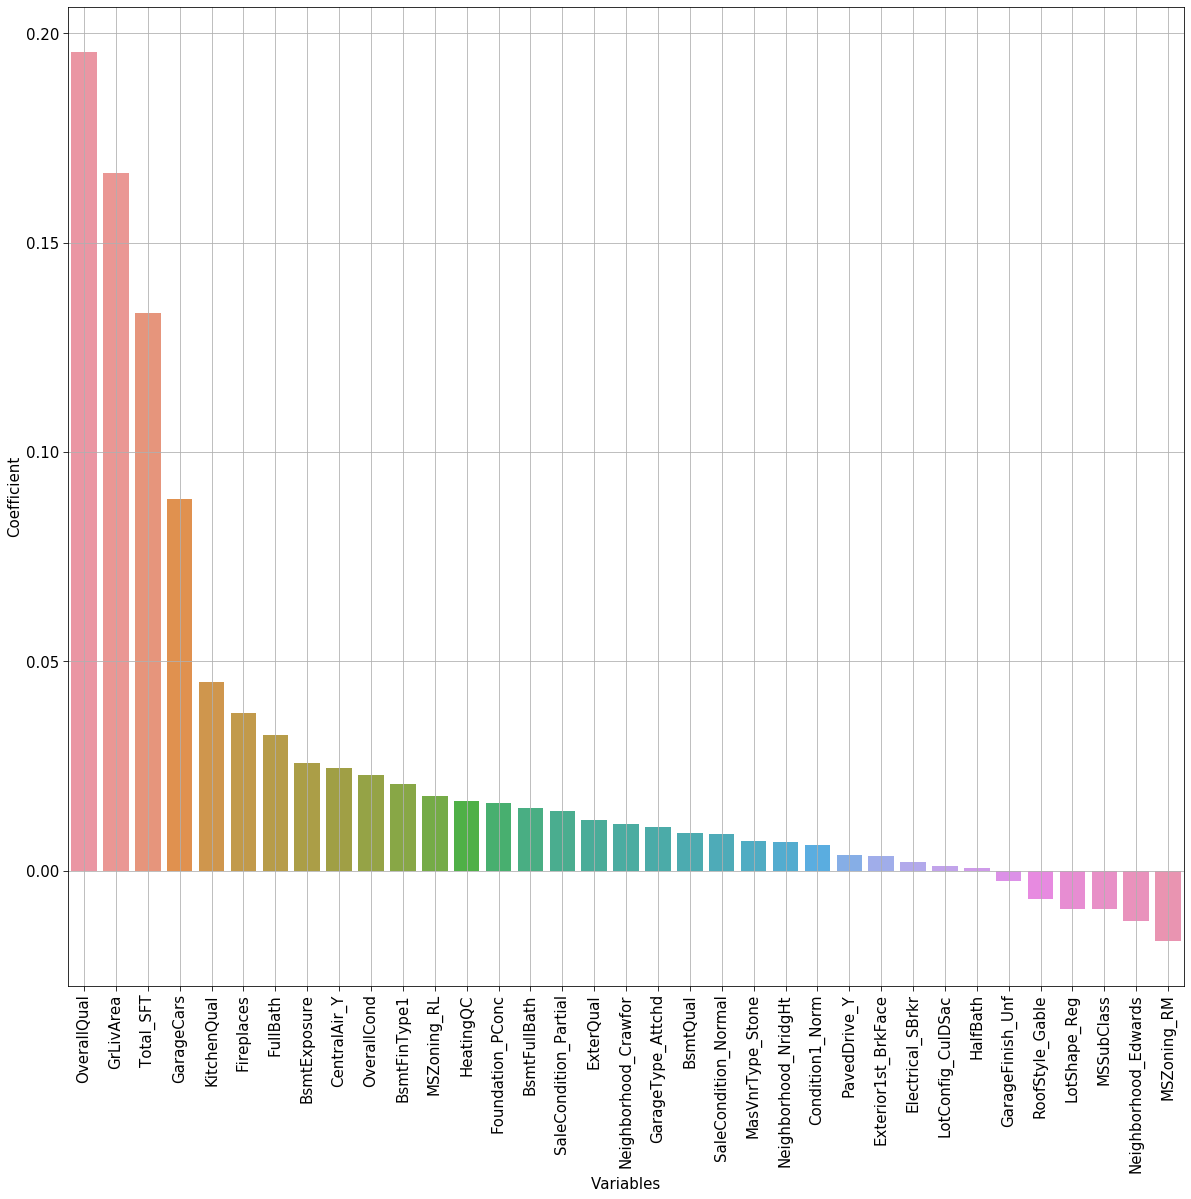

In [141]:
#Plot the variables name and coefficient values
plt.figure(figsize=(20,18))
sns.barplot(x="columns",y="Coefficient",data=feature_imp_lasso)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient",size=15)
plt.xlabel("Variables",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Findings:
- __Lasso has selected 35 significant features out of 188 features.__
- __optimal alpha/regularization value 0.001.__
- __Remaining 188-35 = 153 features have coefficient zero.__
- __We will train other model based on these 34 best features selected by lasso.__
- __Here we can observe how lasso can be used as Feature selection.__

In [142]:
#Important columns selected by Lasso
Final_training_variables = feature_imp_lasso["columns"].values
Final_training_variables

array(['OverallQual', 'GrLivArea', 'Total_SFT', 'GarageCars',
       'KitchenQual', 'Fireplaces', 'FullBath', 'BsmtExposure',
       'CentralAir_Y', 'OverallCond', 'BsmtFinType1', 'MSZoning_RL',
       'HeatingQC', 'Foundation_PConc', 'BsmtFullBath',
       'SaleCondition_Partial', 'ExterQual', 'Neighborhood_Crawfor',
       'GarageType_Attchd', 'BsmtQual', 'SaleCondition_Normal',
       'MasVnrType_Stone', 'Neighborhood_NridgHt', 'Condition1_Norm',
       'PavedDrive_Y', 'Exterior1st_BrkFace', 'Electrical_SBrkr',
       'LotConfig_CulDSac', 'HalfBath', 'GarageFinish_Unf',
       'RoofStyle_Gable', 'LotShape_Reg', 'MSSubClass',
       'Neighborhood_Edwards', 'MSZoning_RM'], dtype=object)

## Create new Training and Test Data by Utilizing Lasso Feature Selection:


In [143]:
#form new training data with filtered columns ,35 columns are included
X_train_new = X_train[Final_training_variables]
X_test_new = X_test[Final_training_variables]

## Ridge Regression:

### Ridge Training:-

In [144]:
rd_model=Ridge() #Instantiates the Ridge class
alpha_param=[0.001,0.01,0.1,0.5,1,5,10]  # Select the alpha value for parameter tunning
param_grid = {"alpha":alpha_param}
search=GridSearchCV(rd_model,param_grid,cv=5) #finetune paramteres with gridsearchcv
search.fit(X_train_new,y_train) # Model training

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Check best parameters from cross validation

In [145]:
print(f"Best Alpha value:{search.best_params_}")

Best Alpha value:{'alpha': 1}


In [146]:
print(f"The Training score:{search.score(X_train_new,y_train)}")

The Training score:0.887424588768313


In [147]:
y_pred_ridge = search.predict(X_test_new)

In [148]:
r2_score(y_test,y_pred_ridge)

0.8819431864773033

In [149]:
#Check detail results
search.cv_results_

{'mean_fit_time': array([0.00541835, 0.00639653, 0.00501513, 0.00511923, 0.00506511,
        0.00486217, 0.00645537]),
 'std_fit_time': array([0.0021165 , 0.00127111, 0.00067637, 0.00055248, 0.0008327 ,
        0.00056775, 0.00277395]),
 'mean_score_time': array([0.00294614, 0.00301952, 0.0023962 , 0.02392478, 0.00250854,
        0.00304618, 0.00231023]),
 'std_score_time': array([0.00061762, 0.00060843, 0.00048702, 0.04187074, 0.00090847,
        0.00067646, 0.00167273]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 0.5, 1, 5, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 5},
  {'alpha': 10}],
 'split0_test_score': array([0.74248742, 0.74288992, 0.74586805, 0.75605787, 0.76555862,
        0.79444484, 0.8002468 ]),
 'split1_test_score': array([0.87346794, 0.87341638, 0.87291764, 0.870907

__Train the ridge model again for Best Alpha value(regularization).__


In [150]:
#Train the model with best alpha value and check the training score
rd_model_final=Ridge(alpha=1)
rd_model_final.fit(X_train_new,y_train)
rd_model_final.score(X_train_new,y_train) #check training score

0.887424588768313

__The Training score we get is closed to 88%.__

In [151]:
#check prediction and score
y_pred = rd_model_final.predict(X_test_new)

In [152]:
from sklearn.metrics import r2_score

In [153]:
#check the model performance 
r2_score(y_test,y_pred)

0.8819431864773033

In [154]:
print(f"Final Traing score in Ridge after Feature selection:{rd_model_final.score(X_train_new,y_train)}")
print(f"Test score in Ridge after Feature selection:{r2_score(y_test,y_pred)}")

Final Traing score in Ridge after Feature selection:0.887424588768313
Test score in Ridge after Feature selection:0.8819431864773033


In [155]:
# create a DataFrame with various variables and coefficient value from Ridge
ridge_coeff = pd.DataFrame({"columns":X_train_new.columns,"Coefficient":rd_model_final.coef_})
feature_imp_ridge = ridge_coeff[ridge_coeff["Coefficient"]!=0.0].sort_values(by="Coefficient",ascending=False)
feature_imp_ridge.reset_index()

index                columns  Coefficient
0       1              GrLivArea     0.195708
1       2              Total_SFT     0.185390
2       0            OverallQual     0.149829
3       3             GarageCars     0.086021
4       9            OverallCond     0.067078
5       6               FullBath     0.053472
6      19               BsmtQual     0.042002
7      15  SaleCondition_Partial     0.037060
8      17   Neighborhood_Crawfor     0.035886
9       4            KitchenQual     0.034327
10     14           BsmtFullBath     0.032700
11     25    Exterior1st_BrkFace     0.032045
12      7           BsmtExposure     0.030043
13      8           CentralAir_Y     0.029434
14     20   SaleCondition_Normal     0.027145
15      5             Fireplaces     0.026759
16     22   Neighborhood_NridgHt     0.025130
17     16              ExterQual     0.024513
18     27      LotConfig_CulDSac     0.020811
19     12              HeatingQC     0.019826
20     10           BsmtFinType1     0.017665
21     23        Condition1_Norm     0.016272
22     21       MasVnrType_Stone     0.013157
23     13       Foundation_PConc     0.012998
24     24           PavedDrive_Y     0.010009
25     11            MSZoning_RL     0.009566
26     28               HalfBath     0.009484
27     18      GarageType_Attchd     0.007769
28     26       Electrical_SBrkr     0.005272
29     29       GarageFinish_Unf    -0.003074
30     31           LotShape_Reg    -0.003168
31     30        RoofStyle_Gable    -0.007224
32     33   Neighborhood_Edwards    -0.022296
33     34            MSZoning_RM    -0.023552
34     32             MSSubClass    -0.031463

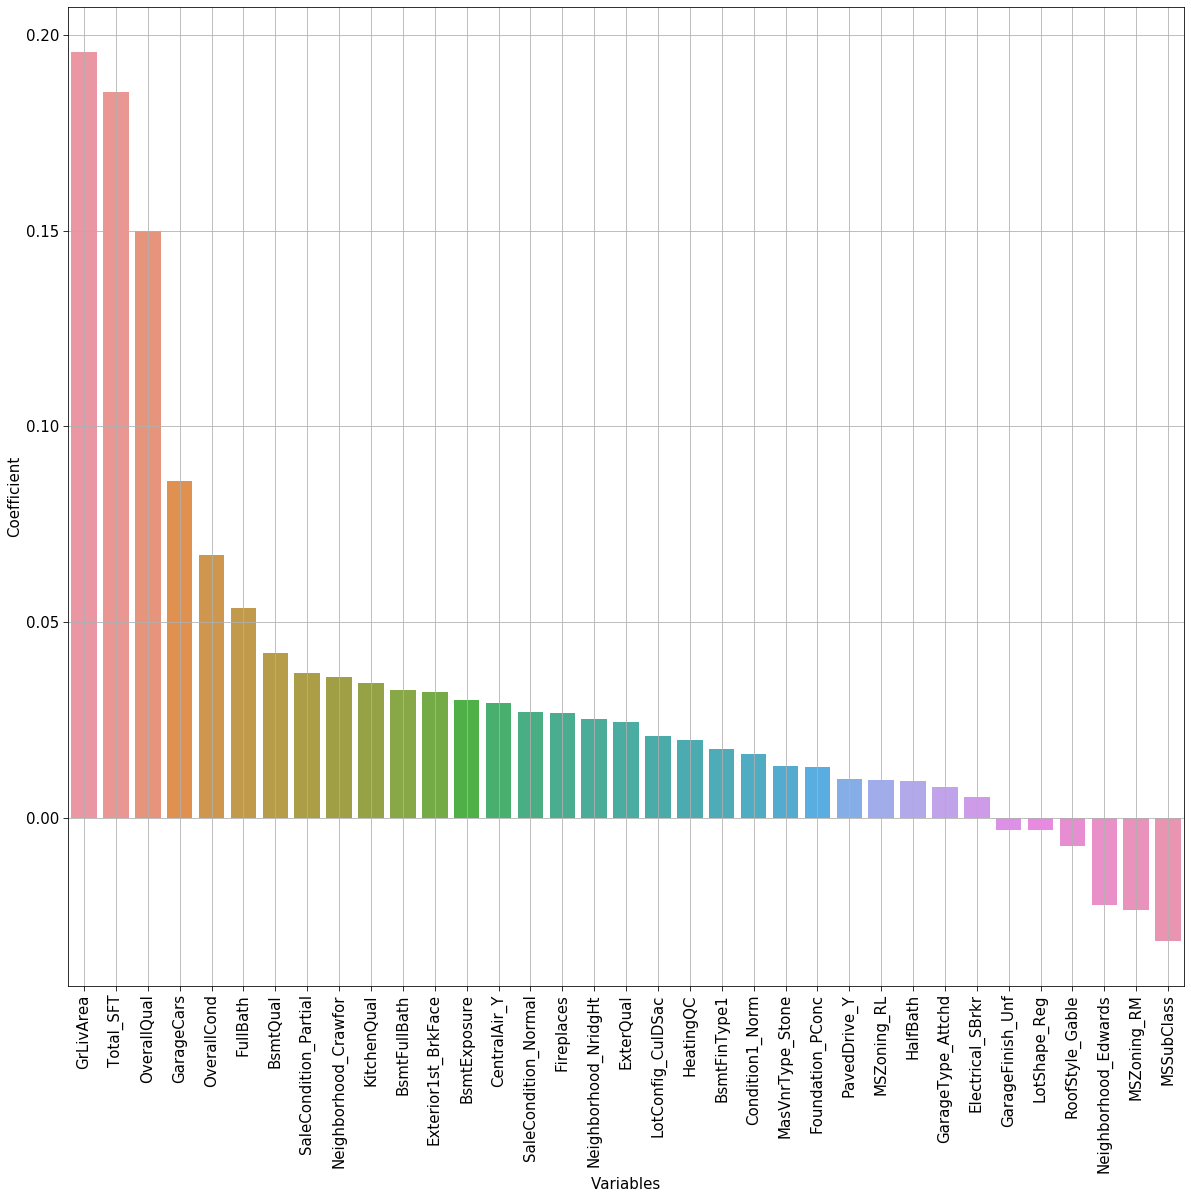

In [156]:
##Plot the variables name and coefficient values in Ridge regression
plt.figure(figsize=(20,18))
sns.barplot(x="columns",y="Coefficient",data=feature_imp_ridge)
plt.xticks(rotation="vertical")
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.ylabel("Coefficient",size=15)
plt.xlabel("Variables",size=15)
plt.grid(0.3)


## ElasticNet

In [157]:
#ElasticNet model training and hyperparamter tuning 
model_elastic = ElasticNet()
alpha_param=[0.001,0.01,0.1,0.5,1,5,10]
param_grid = {"alpha":alpha_param}
search_elastic=GridSearchCV(model_elastic,param_grid,cv=5)
search_elastic.fit(X_train_new,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
#check the best alphs value for elasticnet
print(search_elastic.best_params_)


{'alpha': 0.001}


In [159]:
#use the best alpha value from cross validation to train ElasticNet 
model_elastic_final = ElasticNet(alpha=0.001)
model_elastic_final.fit(X_train_new,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [160]:
#check the elasticnet training score
model_elastic_final.score(X_train_new,y_train)

0.8815839698002395

In [161]:
y_pred = model_elastic_final.predict(X_test_new)

In [162]:
#Check the R-squared value
r2_score(y_test,y_pred)

0.8780441983346896

In [163]:
print(f"Final Traing score in Ridge after Feature selection:{model_elastic_final.score(X_train_new,y_train)}")
print(f"Test score in Ridge after Feature selection:{r2_score(y_test,y_pred)}")

Final Traing score in Ridge after Feature selection:0.8815839698002395
Test score in Ridge after Feature selection:0.8780441983346896


In [164]:
#Check the elastic net coefficients 
model_elastic_final.coef_

array([ 0.17056407,  0.17718767,  0.16619656,  0.08726934,  0.03961172,
        0.03196258,  0.04284507,  0.02787119,  0.02707771,  0.04559856,
        0.01908018,  0.01355663,  0.01819142,  0.01468502,  0.02400166,
        0.02589055,  0.01884686,  0.02365396,  0.00918293,  0.02647571,
        0.01813184,  0.01018018,  0.01624285,  0.0112985 ,  0.00694133,
        0.01805689,  0.00373694,  0.01114302,  0.00492514, -0.00281626,
       -0.00695249, -0.00602698, -0.02036114, -0.01720147, -0.02029491])

In [165]:
## create a DataFrame with various variables and coefficient value from ElasticNet
elasticnet_coeff = pd.DataFrame({"columns":X_train_new.columns,"Coefficient":model_elastic_final.coef_})
feature_imp_elasticnet = elasticnet_coeff[elasticnet_coeff["Coefficient"]!=0.0].sort_values(by="Coefficient",ascending=False)
feature_imp_elasticnet.reset_index()

index                columns  Coefficient
0       1              GrLivArea     0.177188
1       0            OverallQual     0.170564
2       2              Total_SFT     0.166197
3       3             GarageCars     0.087269
4       9            OverallCond     0.045599
5       6               FullBath     0.042845
6       4            KitchenQual     0.039612
7       5             Fireplaces     0.031963
8       7           BsmtExposure     0.027871
9       8           CentralAir_Y     0.027078
10     19               BsmtQual     0.026476
11     15  SaleCondition_Partial     0.025891
12     14           BsmtFullBath     0.024002
13     17   Neighborhood_Crawfor     0.023654
14     10           BsmtFinType1     0.019080
15     16              ExterQual     0.018847
16     12              HeatingQC     0.018191
17     20   SaleCondition_Normal     0.018132
18     25    Exterior1st_BrkFace     0.018057
19     22   Neighborhood_NridgHt     0.016243
20     13       Foundation_PConc     0.014685
21     11            MSZoning_RL     0.013557
22     23        Condition1_Norm     0.011298
23     27      LotConfig_CulDSac     0.011143
24     21       MasVnrType_Stone     0.010180
25     18      GarageType_Attchd     0.009183
26     24           PavedDrive_Y     0.006941
27     28               HalfBath     0.004925
28     26       Electrical_SBrkr     0.003737
29     29       GarageFinish_Unf    -0.002816
30     31           LotShape_Reg    -0.006027
31     30        RoofStyle_Gable    -0.006952
32     33   Neighborhood_Edwards    -0.017201
33     34            MSZoning_RM    -0.020295
34     32             MSSubClass    -0.020361

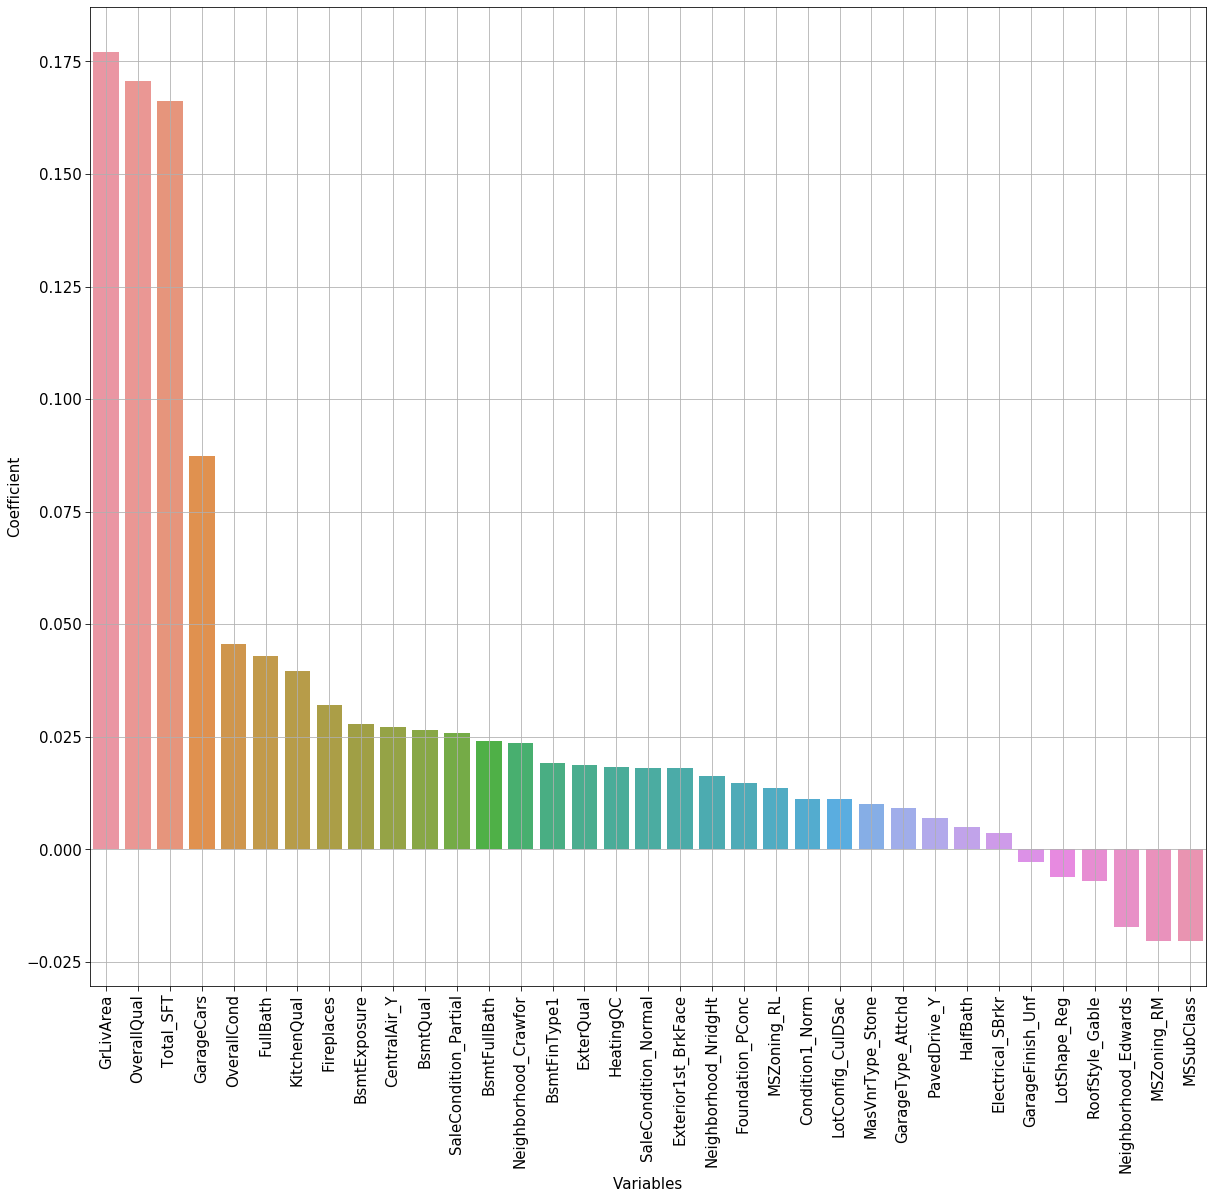

In [166]:
##Plot the variables name and coefficient values in ElasticNet 
plt.figure(figsize=(20,18))
sns.barplot(x="columns",y="Coefficient",data=feature_imp_elasticnet)
plt.xticks(rotation="vertical")
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.ylabel("Coefficient",size=15)
plt.xlabel("Variables",size=15)
plt.grid(0.3)

## Findings:
- __Ridge gives us:__
    - trainign score __88.74__ 
    - test score __88.19.__
    - optimal Alpha value __1__
    - No of variables __35__
- __ElasticNet gives us:__
    - trainin score __88.15__
    - test score __87.80__
    - alpha value __0.001__
    - No of variables __35__

## Further Feature Selections :

__Now we try to generlize the model more by selecting most significant variables having positive and negative coefficients__

- Earlier we have trained our model with 35 features.
- Now we will reduce the no of variables to around 18 by the magnitude of coeffcients
- This is required to make our model optimal,generalize and interpretable.


In [167]:
more_selected_columns = ["GrLivArea","Total_SFT","OverallQual","GarageCars","OverallCond","FullBath","BsmtQual",
                         "SaleCondition_Partial","BsmtFullBath","Neighborhood_Crawfor","BsmtFinType1",
                         "ExterQual","HeatingQC","SaleCondition_Normal","Exterior1st_BrkFace","Neighborhood_Edwards",
                         "MSZoning_RM","MSSubClass"]

In [168]:
print(f"No of Feature Selected based on coefficient Magnitude:{ len(more_selected_columns)}")

No of Feature Selected based on coefficient Magnitude:18


In [169]:
# New filters training data
X_train_new_filtered = X_train_new[more_selected_columns]

In [170]:
# New filter test data
X_test_new_filtered = X_test_new[more_selected_columns]

In [171]:
# Ridge Model training

r_model = Ridge(alpha=1)
r_model.fit(X_train_new_filtered,y_train)
r_model.score(X_train_new_filtered,y_train)


0.8653760063076994

In [172]:
y_pred_new_ridge = r_model.predict(X_test_new_filtered)

In [173]:
#check R-squared
r2_score(y_test,y_pred_new_ridge)

0.8618377871464924

In [174]:
#Mapping of variable and coefficient value in ridge 
dict(zip(X_test_new_filtered.columns,r_model.coef_))

{'GrLivArea': 0.1913847806568764,
 'Total_SFT': 0.1969596048474319,
 'OverallQual': 0.20271575794508043,
 'GarageCars': 0.11217087875432323,
 'OverallCond': 0.06891441734493126,
 'FullBath': 0.04869648444393304,
 'BsmtQual': 0.0797355835900504,
 'SaleCondition_Partial': 0.04404919092933857,
 'BsmtFullBath': 0.03936048015753594,
 'Neighborhood_Crawfor': 0.034336180755935086,
 'BsmtFinType1': 0.02983577747601223,
 'ExterQual': 0.0557262895231772,
 'HeatingQC': 0.03562844486776704,
 'SaleCondition_Normal': 0.028785269463964855,
 'Exterior1st_BrkFace': 0.03699141225210385,
 'Neighborhood_Edwards': -0.025461203747535757,
 'MSZoning_RM': -0.04160486886594161,
 'MSSubClass': -0.03198232183952495}

## Findings:
- No of variables used 18.
- Ridge gives us training score 86.3% and test score 86%

## ElasticNet

In [175]:
# ElasticNet Model training
en_model = ElasticNet(alpha=0.001)
en_model.fit(X_train_new_filtered,y_train)
en_model.score(X_train_new_filtered,y_train)





0.8605891012463807

In [176]:
y_pred_elasticnet = en_model.predict(X_test_new_filtered)

In [177]:
#check R-squared for elasticnet
r2_score(y_test,y_pred_elasticnet)

0.8601188872646603

In [178]:
#check coefficients of elasticnet
en_model.coef_

array([ 0.16781157,  0.18446666,  0.22441047,  0.1114374 ,  0.04734718,
        0.04165526,  0.06252319,  0.03170578,  0.03172994,  0.02334159,
        0.03077183,  0.05013638,  0.03434934,  0.02025521,  0.02404015,
       -0.02043103, -0.04107627, -0.02440639])

In [179]:
#Mapping of variable and coefficient value
dict(zip(X_test_new_filtered.columns,en_model.coef_))

{'GrLivArea': 0.16781157237995264,
 'Total_SFT': 0.1844666608512308,
 'OverallQual': 0.22441046890852842,
 'GarageCars': 0.11143739719266839,
 'OverallCond': 0.04734717835646735,
 'FullBath': 0.0416552575591011,
 'BsmtQual': 0.06252319195495634,
 'SaleCondition_Partial': 0.03170578478958077,
 'BsmtFullBath': 0.03172994185348791,
 'Neighborhood_Crawfor': 0.02334159241262358,
 'BsmtFinType1': 0.030771830374576578,
 'ExterQual': 0.05013638491426224,
 'HeatingQC': 0.034349338471696585,
 'SaleCondition_Normal': 0.02025521439241151,
 'Exterior1st_BrkFace': 0.02404015235957943,
 'Neighborhood_Edwards': -0.020431028809358116,
 'MSZoning_RM': -0.04107626628423163,
 'MSSubClass': -0.024406388037547726}

## Findings:
- No of variables used 18.
- ElasticNet gives us training score 86% and test score 86%